In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_excel('/Users/tiffany/Downloads/Spotify_data.xlsx')
df.shape

(520, 20)

# Data Road Î∞è Ï†ÑÏ≤òÎ¶¨
- Î¨∏ÏûêÌòï Îç∞Ïù¥ÌÑ∞Í∞Ä ÎßéÏùå

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       312 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

In [4]:
df.head()

Age  Gender spotify_usage_period  \
0  20-35  Female    More than 2 years   
1  12-20    Male    More than 2 years   
2  35-60  Others   6 months to 1 year   
3  20-35  Female    1 year to 2 years   
4  20-35  Female    1 year to 2 years   

                         spotify_listening_device spotify_subscription_plan  \
0              Smart speakers or voice assistants       Free (ad-supported)   
1                              Computer or laptop       Free (ad-supported)   
2              Smart speakers or voice assistants       Free (ad-supported)   
3  Smartphone, Smart speakers or voice assistants       Free (ad-supported)   
4                                      Smartphone       Free (ad-supported)   

  premium_sub_willingness          preffered_premium_plan  \
0                     Yes        Family Plan-Rs 179/month   
1                     Yes  Individual Plan- Rs 119/ month   
2                     Yes        Student Plan-Rs 59/month   
3                      No                             NaN   
4                      No                             NaN   

  preferred_listening_content fav_music_genre music_time_slot  \
0                     Podcast          Melody           Night   
1                     Podcast             Rap       Afternoon   
2                     Podcast             Pop           Night   
3                       Music          Melody           Night   
4                       Music          Melody           Night   

                              music_Influencial_mood  \
0                              Sadness or melancholy   
1                       Social gatherings or parties   
2                       Relaxation and stress relief   
3  Relaxation and stress relief, Social gathering...   
4                       Relaxation and stress relief   

                           music_lis_frequency           music_expl_method  \
0                                 leisure time                   Playlists   
1                              Workout session                   Playlists   
2                 Study Hours, While Traveling                   Playlists   
3  Office hours, Workout session, leisure time  recommendations, Playlists   
4                                 leisure time  recommendations, Playlists   

   music_recc_rating     pod_lis_frequency         fav_pod_genre  \
0                  3                 Daily                Comedy   
1                  2  Several times a week                Comedy   
2                  4           Once a week                Sports   
3                  4                 Never                   NaN   
4                  4                Rarely  Lifestyle and Health   

  preffered_pod_format     pod_host_preference preffered_pod_duration  \
0            Interview                    Both                   Both   
1            Interview                    Both                    NaN   
2            Interview                     NaN                   Both   
3                  NaN                     NaN                    NaN   
4        Story telling  Well known individuals                   Both   

  pod_variety_satisfaction  
0                       Ok  
1                Satisfied  
2                Satisfied  
3                       Ok  
4                       Ok

In [5]:
df.isna().sum()

Age                              0
Gender                           0
spotify_usage_period             0
spotify_listening_device         0
spotify_subscription_plan        0
premium_sub_willingness          0
preffered_premium_plan         208
preferred_listening_content      0
fav_music_genre                  0
music_time_slot                  0
music_Influencial_mood           0
music_lis_frequency              0
music_expl_method                0
music_recc_rating                0
pod_lis_frequency                0
fav_pod_genre                  148
preffered_pod_format           140
pod_host_preference            141
preffered_pod_duration         129
pod_variety_satisfaction         0
dtype: int64

In [6]:
# ÎÇòÏù¥ ÏûêÏ≤¥Î≥¥Îã§Îäî Ïó∞Î†πÎåÄÎ•º Íµ¨Î∂ÑÌï¥ÎÜìÏùå 20~35ÏÑ∏Í∞Ä ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎÜíÏùå
df['Age'].value_counts()

Age
20-35    422
12-20     71
35-60     23
6-12       3
60+        1
Name: count, dtype: int64

In [7]:
# Ïó¨ÏÑ±Ïù¥ ÎÇ®ÏÑ±Î≥¥Îã§ 3Î∞∞ Ïù¥ÏÉÅ ÎÜíÎÑ§? Ïä§Ìè¨Ìã∞ÌååÏù¥ Ïï± ÏûêÏ≤¥Î•º Ïó¨ÏÑ±Ïù¥ Îçî ÎßéÏù¥ Ïì∞ÎäîÍ∞Ä? ÌôïÏù∏Ìï¥Î≥¥Ïûê ‚òÖ
df['Gender'].value_counts()

Gender
Female    391
Male      114
Others     15
Name: count, dtype: int64

- Ïã§Ï†úÎ°ú ÌïúÍµ≠ Î°†Ïπ≠ ÌõÑ 21ÎÖÑ 3Ïõî Ïù¥ÌõÑ Íæ∏Ï§ÄÌûà ÏÇ¨Ïö©Ïûê Ïàò Ï¶ùÍ∞ÄÌïòÎäîÎç∞ 
    - Ïù¥Ïö©ÏûêÏùò 60% Ïù¥ÏÉÅÏù¥ 29ÏÑ∏ ÎØ∏ÎßåÏùò Ïó∞Î†πÎåÄÏòÄÏúºÎ©∞ ÏÑ±ÎπÑÎäî Ïó¨ÏÑ±Ïù¥ 57.43%Î°ú ÎÇ®ÏÑ±Î≥¥Îã§ ÎßéÏïòÎã§Í≥† Ìï®

## Ïª¨Îüº Î≥Ñ value_counts
- spotify_usage_period : 1ÎÖÑ-2ÎÖÑ, 2ÎÖÑ Ïù¥ÏÉÅ, 6Í∞úÏõî-1ÎÖÑ ÎåÄÎ∂ÄÎ∂Ñ ÎπÑÏä∑ÌïòÍ≤å ÎÜíÏùå, Ïã†Í∑ú Í≥†Í∞ù(6Í∞úÏõîÎØ∏Îßå)Î≥¥Îã§ Ïò§Îûò ÏÇ¨Ïö©Ìïú Ïú†Ï†Ä ÏàòÍ∞Ä Îçî ÎßéÏùå
    - Ïã†Í∑ú Ïú†Ï†ÄÎ•º Î™®Í∞ùÌïòÍ∏∞ ÏúÑÌï¥ÏÑú Ïñ¥ÎñªÍ≤å Ìï¥ÏïºÌï†ÏßÄ Ï†ÑÎûµ ÌïÑÏöî
- spotify_listening_device : Ïä§ÎßàÌä∏Ìè∞ ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎÜíÍ≥† Îã§Î•∏ Í∏∞Í∏∞ Ìï®Íªò ÏÇ¨Ïö©ÌïòÎäî Ïú†Ï†Ä Ï†ÅÏùå
- spotify_subscription_plan : Íµ¨ÎèÖÌîåÎûúÎ∞©Î≤ï
- Í¥ëÍ≥†Î•º Î≥¥ÎçîÎùºÎèÑ Î¨¥Î£åÎ°ú ÏÇ¨Ïö©ÌïòÎäî Ïú†Ï†Ä 4Î∞∞Ïù¥ÏÉÅ ÎÜíÏùå. Ïú†Î£å Í≥†Í∞ù ÎÜíÏùº Ï†ÑÎûµ ÌïÑÏöî. Ïä§Ìè¨Ìã∞ÌååÏù¥Ïùò BM ÌôïÏù∏ ÌïÑÏöî
- premium_sub_willingness : Ïú†Î£åÏ†ÑÌôòÏùòÏßÄÏú†Î£åÏ†ÑÌôòÏùòÏßÄ
- Ïù¥ÏäàÎã§. Ïú†Ï†ÄÎì§Ïù¥ ÎØ∏ÎûòÏóê ÎèàÏùÑ Ï¢Ä Îçî ÎÇ¥ÏÑú ÌîÑÎ¶¨ÎØ∏ÏóÑÏùÑ ÌïòÍ±∞ÎÇò ÏïûÏúºÎ°ú Í≥ÑÏèôÌï¥ÏÑú ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖÏùÑ Ïú†ÏßÄÌï† ÏùòÏßÄÍ∞Ä ÏóÜÎã§
- preffered_premium_plan : ÌîåÎûúÏÑ†Ìò∏ÎèÑÏ°∞ÏÇ¨
    - Individual Plan- Rs 119/month (Í∞úÏù∏ ÌîåÎûú - Ïõî 119Î£®Ìîº): 95Î™ÖÏù¥ Ïù¥ ÌîåÎûúÏùÑ ÏÑ†Ìò∏Ìï©ÎãàÎã§.
    - Student Plan-Rs 59/month (ÌïôÏÉù ÌîåÎûú - Ïõî 59Î£®Ìîº): 94Î™ÖÏù¥ Ïù¥ ÌîåÎûúÏùÑ ÏÑ†Ìò∏Ìï©ÎãàÎã§.
    - Duo plan- Rs 149/month (ÎìÄÏò§ ÌîåÎûú - Ïõî 149Î£®Ìîº): 84Î™ÖÏù¥ Ïù¥ ÌîåÎûúÏùÑ ÏÑ†Ìò∏Ìï©ÎãàÎã§.
    - Family Plan-Rs 179/month (Í∞ÄÏ°± ÌîåÎûú - Ïõî 179Î£®Ìîº): 39Î™ÖÏù¥ Ïù¥ ÌîåÎûúÏùÑ ÏÑ†Ìò∏Ìï©ÎãàÎã§.
    - preferred_listening_content : ÏÑ†Ìò∏ÌïòÎäî Ï≤≠Ï∑® ÏΩòÌÖêÏ∏†
- preferred_listening_content : ÏùåÏïÖÏù¥ Ìõ®Ïî¨ ÎÜíÏùå
- fav_music_genre : Ï¢ãÏïÑÌïòÎäî ÏùåÏïÖ Ïû•Î•¥
    - Î©úÎ°úÎîî, ÌÅ¥ÎûòÏãù, Ìåù, Îì±Îì±
- music_time_slot : ÏùåÏïÖÏ≤≠Ï∑®ÏãúÍ∞ÑÎåÄ 
    - night>afternoon>morning 
    - ÏïÑÏπ®Ïóê Ïôú Ïûò ÏïàÎì§ÏúºÏÑ∏Ïöî?? (Îã®Ïàú Í∂ÅÍ∏àÏ¶ù)


In [8]:
# Î™®Îì† Ïª¨Îüº value_counts()
for column in df.columns:
    print(f"Ïª¨ÎüºÎ™Ö: {column}")
    print(df[column].value_counts())
    print("---------------------------------------")

Ïª¨ÎüºÎ™Ö: Age
Age
20-35    422
12-20     71
35-60     23
6-12       3
60+        1
Name: count, dtype: int64
---------------------------------------
Ïª¨ÎüºÎ™Ö: Gender
Gender
Female    391
Male      114
Others     15
Name: count, dtype: int64
---------------------------------------
Ïª¨ÎüºÎ™Ö: spotify_usage_period
spotify_usage_period
More than 2 years     169
1 year to 2 years     141
6 months to 1 year    119
Less than 6 months     91
Name: count, dtype: int64
---------------------------------------
Ïª¨ÎüºÎ™Ö: spotify_listening_device
spotify_listening_device
Smartphone                                                                              300
Computer or laptop                                                                       54
Smartphone, Computer or laptop                                                           48
Smart speakers or voice assistants                                                       43
Computer or laptop, Smart speakers or voice assistants           

## Ïª¨ÎüºÎ™Ö(ÌïúÍ∏Ä) Î∞îÍæ∏Í∏∞

In [9]:
new_columns = {
    'Age': 'ÎÇòÏù¥',
    'Gender': 'ÏÑ±Î≥Ñ',
    'spotify_usage_period': 'ÏÇ¨Ïö©Í∏∞Í∞Ñ',
    'spotify_listening_device': 'Ï≤≠Ï∑® ÎîîÎ∞îÏù¥Ïä§',
    'spotify_subscription_plan': 'Íµ¨ÎèÖ ÌîåÎûú',
    'premium_sub_willingness': 'ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•',
    'preffered_premium_plan': 'ÏÑ†Ìò∏ÌïòÎäî ÌîÑÎ¶¨ÎØ∏ÏóÑ ÌîåÎûú',
    'preferred_listening_content': 'ÏÑ†Ìò∏ÌïòÎäî Ï≤≠Ï∑® ÏΩòÌÖêÏ∏†',
    'fav_music_genre': 'Ï¢ãÏïÑÌïòÎäî ÏùåÏïÖ Ïû•Î•¥',
    'music_time_slot': 'ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ',
    'music_Influencial_mood': 'ÏùåÏïÖÏÑ†ÌÉùÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî mood',
    'music_lis_frequency': 'ÏùåÏïÖ Ï≤≠Ï∑® ÎπàÎèÑ',
    'music_expl_method': 'ÏùåÏïÖ ÌÉêÌóò Î∞©Î≤ï',
    'music_recc_rating': 'ÏùåÏïÖ Ï∂îÏ≤ú ÌèâÍ∞Ä',
    'pod_lis_frequency': 'ÌåüÏ∫êÏä§Ìä∏ Ï≤≠Ï∑® ÎπàÎèÑ',
    'fav_pod_genre': 'ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ Ïû•Î•¥',
    'preffered_pod_format': 'ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ ÌòïÏãù',
    'pod_host_preference': 'ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ Ìò∏Ïä§Ìä∏',
    'preffered_pod_duration': 'ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ Í∏∏Ïù¥',
    'pod_variety_satisfaction': 'ÌåüÏ∫êÏä§Ìä∏ Îã§ÏñëÏÑ± ÎßåÏ°±ÎèÑ'
}

df.rename(columns=new_columns, inplace=True)

In [10]:
df.shape

(520, 20)

In [11]:
# 520Í∞ú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÏñ¥Ïïº ÌïòÎäîÎç∞ ÌåüÏ∫êÏä§Ìä∏ Ï™Ω, 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ÎÇòÏù¥                  520 non-null    object
 1   ÏÑ±Î≥Ñ                  520 non-null    object
 2   ÏÇ¨Ïö©Í∏∞Í∞Ñ                520 non-null    object
 3   Ï≤≠Ï∑® ÎîîÎ∞îÏù¥Ïä§             520 non-null    object
 4   Íµ¨ÎèÖ ÌîåÎûú               520 non-null    object
 5   ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•          520 non-null    object
 6   ÏÑ†Ìò∏ÌïòÎäî ÌîÑÎ¶¨ÎØ∏ÏóÑ ÌîåÎûú        312 non-null    object
 7   ÏÑ†Ìò∏ÌïòÎäî Ï≤≠Ï∑® ÏΩòÌÖêÏ∏†         520 non-null    object
 8   Ï¢ãÏïÑÌïòÎäî ÏùåÏïÖ Ïû•Î•¥          520 non-null    object
 9   ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ           520 non-null    object
 10  ÏùåÏïÖÏÑ†ÌÉùÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî mood  520 non-null    object
 11  ÏùåÏïÖ Ï≤≠Ï∑® ÎπàÎèÑ            520 non-null    object
 12  ÏùåÏïÖ ÌÉêÌóò Î∞©Î≤ï            520 non-null    object
 13  ÏùåÏ

## ÌåüÏ∫êÏä§Ìä∏ Ïª¨Îüº ÏÇ≠Ï†ú
- ÏùºÎã® Í≤∞Ï∏°ÏπòÎèÑ ÎßéÍ≥† Îî±Ìûà ÌåüÏ∫êÏä§Ìä∏ ÏïàÍ∂ÅÍ∏à
- Ïú†Ï†Ä Îç∞Ïù¥ÌÑ∞, ÏÑúÎπÑÏä§ÏßÄÌëú,ÏÑ†Ìò∏ÎèÑ Ï°∞ÏÇ¨Îßå ÏûàÏñ¥ÎèÑ Î∂ÑÏÑùÏóê Î¨∏Ï†ú ÏóÜÏùÑÎìØ

# Î¨∏Ï†ú Ï†ïÏùò
- Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Î∞úÍ≤¨Ìïú Î¨∏Ï†ú
    - Ïú†Ï†Ä Ïàò ‚¨ÜÔ∏è
        - ÎÇ®ÏÑ± ÏÇ¨Ïö©ÏûêÍ∞Ä Ïó¨ÏÑ±Ïóê ÎπÑÌï¥ Ï†ÅÎã§.
        - Ïó∞Î†πÎåÄÍ∞Ä 20ÎåÄÎ°ú, ÌïúÏ†ïÏ†ÅÏù¥Îã§. Îã§ÏñëÌïú Ïó∞Î†πÎåÄÎ°ú ÌôïÏû•ÌïúÎã§?
        - Ïã†Í∑ú Ïú†Ï†Ä Î™®Í∞ù : Ïã†Í∑ú Í≥†Í∞ù(6Í∞úÏõîÎØ∏Îßå)Î≥¥Îã§ Ïò§Îûò ÏÇ¨Ïö©Ìïú Ïú†Ï†Ä ÏàòÍ∞Ä Îçî ÎßéÏùå 
    - ÏàòÏùµ ‚¨ÜÔ∏è
        - Í¥ëÍ≥†Î•º Î≥¥ÎçîÎùºÎèÑ Î¨¥Î£åÎ°ú ÏÇ¨Ïö©ÌïòÎäî Ïú†Ï†Ä 4Î∞∞Ïù¥ÏÉÅ ÎÜíÏùå. Ïú†Î£å Í≥†Í∞ù ÎÜíÏùº Ï†ÑÎûµ ÌïÑÏöî. Ïä§Ìè¨Ìã∞ÌååÏù¥Ïùò BM ÌôïÏù∏ ÌïÑÏöî
        - Ïú†Î£åÏ†ÑÌôòÏùòÏßÄ Ï†ÅÏùå : Ïú†Ï†ÄÎì§Ïù¥ ÎØ∏ÎûòÏóê ÎèàÏùÑ Ï¢Ä Îçî ÎÇ¥ÏÑú ÌîÑÎ¶¨ÎØ∏ÏóÑÏùÑ ÌïòÍ±∞ÎÇò ÏïûÏúºÎ°ú Í≥ÑÏèôÌï¥ÏÑú ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖÏùÑ Ïú†ÏßÄÌï† ÏùòÏßÄÍ∞Ä ÏóÜÎã§

# EDA
- ÏÑ±Î≥Ñ/Ïó∞Î†πÎåÄ Î≥ÑÎ°ú Ï∞®Ïù¥Ï†ê ÌôïÏù∏ (ÏÑúÎπÑÏä§ ÏßÄÌëú, ÏÑ†Ìò∏ÎèÑ Ï°∞ÏÇ¨)
- ÏÇ¨Ïö©Í∏∞Í∞Ñ Ïã†Í∑úÏú†Ï†Ä/Ïû•Í∏∞ Ïú†Ï†ÄÍ∞ÑÏùò Ï∞®Ïù¥Ï†ê ÌôïÏù∏ (ÏÑúÎπÑÏä§ ÏßÄÌëúÎ°ú)
- Ïú†Î£åÎ°ú Ï†ÑÌôòÌïòÍ±∞ÎÇò ÏßÄÏÜçÌï† ÏùòÌñ•Ïù¥ ÏûàÎã§Í≥† Ìïú ÏÇ¨ÎûåÎì§ÏùÄ Ïôú Í∑∏Îû¨ÏùÑÏßÄ ÌôïÏù∏

## Spotify ÏÇ¨Ïö©ÏûêÏùò Ïó∞Î†π, ÏÑ±Î≥Ñ Î∂ÑÌè¨

In [12]:
df['ÎÇòÏù¥'].value_counts()

ÎÇòÏù¥
20-35    422
12-20     71
35-60     23
6-12       3
60+        1
Name: count, dtype: int64

In [13]:
y=df['ÎÇòÏù¥'].value_counts()
plt.figure(figsize=(5,5))
labels=['20-35','12-20','6-10','35-60','60+']
plt.pie(y, labels=labels, autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Spotify ÏÇ¨Ïö©ÏûêÏùò Ïó∞Î†π Î∂ÑÌè¨')
plt.show()

In [14]:
df['ÏÑ±Î≥Ñ'].value_counts()

ÏÑ±Î≥Ñ
Female    391
Male      114
Others     15
Name: count, dtype: int64

In [15]:
y=df['ÏÑ±Î≥Ñ'].value_counts()
plt.figure(figsize=(5,5))
labels=['Ïó¨ÏÑ±', 'ÎÇ®ÏÑ±', 'Í∑∏Ïô∏']
plt.pie(y, labels=labels, autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Spotify ÏÇ¨Ïö©ÏûêÏùò ÏÑ±Î≥Ñ Î∂ÑÌè¨')
plt.show()

In [16]:
plt.title('Spotify ÏÇ¨Ïö©ÏûêÏùò Ïó∞Î†πÎåÄÎ≥Ñ ÏÑ±Î≥Ñ Î∂ÑÌè¨')
sns.countplot(x='ÎÇòÏù¥', data=df, hue='ÏÑ±Î≥Ñ', order=['6-12', '12-20', '20-35', '35-60', '60+'])

<Axes: title={'center': 'Spotify ÏÇ¨Ïö©ÏûêÏùò Ïó∞Î†πÎåÄÎ≥Ñ ÏÑ±Î≥Ñ Î∂ÑÌè¨'}, xlabel='ÎÇòÏù¥', ylabel='count'>

## ÏÑ±Î≥Ñ Î≥ÑÎ°ú Ï∞®Ïù¥Ï†ê ÌôïÏù∏ (ÏÑúÎπÑÏä§ ÏßÄÌëú, ÏÑ†Ìò∏ÎèÑ Ï°∞ÏÇ¨)

### ÏÑúÎπÑÏä§ ÏßÄÌëú

Text(0.5, 1.0, 'ÏÑ±Î≥Ñ Î≥Ñ ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ')

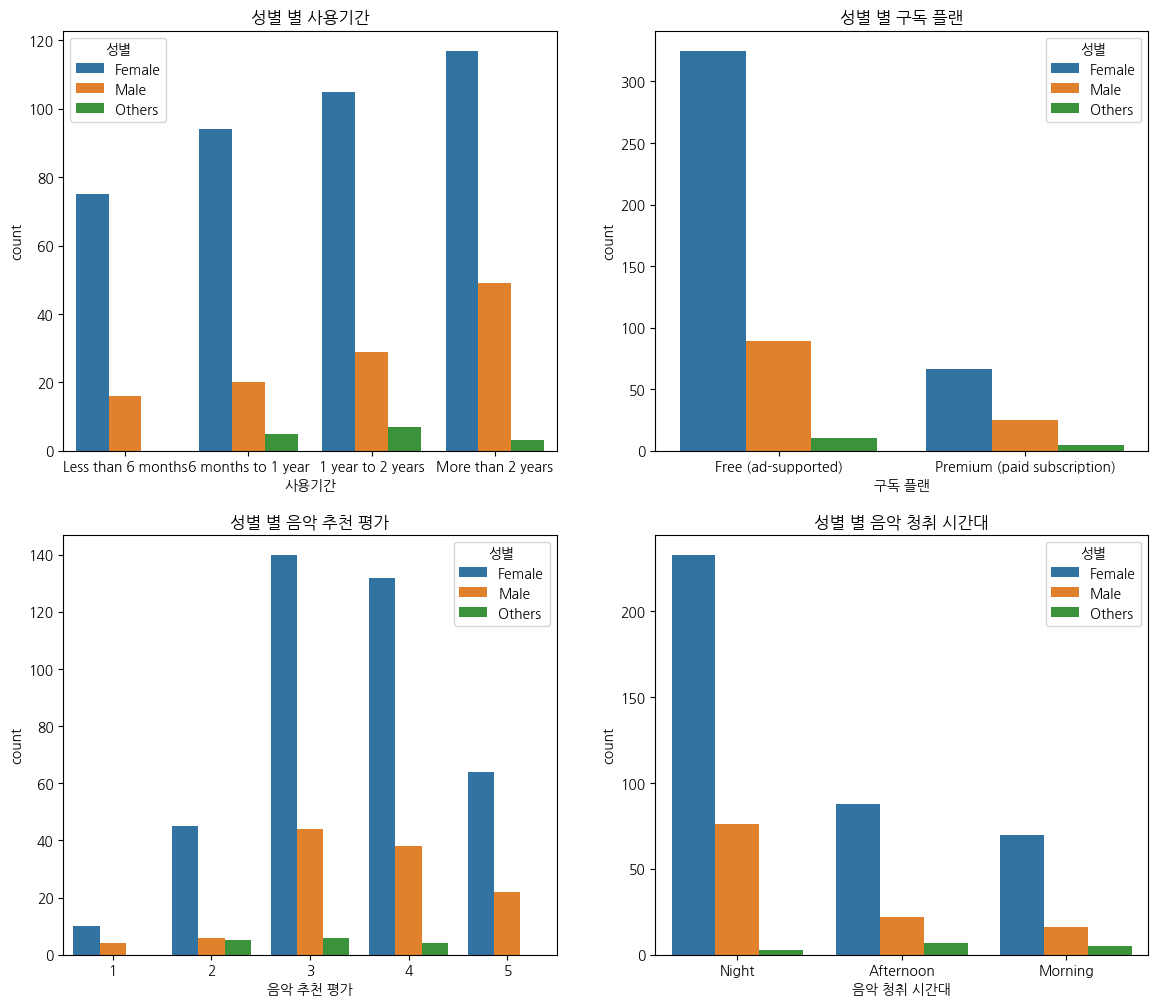

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

sns.countplot(x='ÏÇ¨Ïö©Í∏∞Í∞Ñ', data=df, hue='ÏÑ±Î≥Ñ', 
              order=['Less than 6 months', '6 months to 1 year', '1 year to 2 years', 'More than 2 years'],
              ax=axes[0, 0])
axes[0, 0].set_title('ÏÑ±Î≥Ñ Î≥Ñ ÏÇ¨Ïö©Í∏∞Í∞Ñ')

sns.countplot(x='Íµ¨ÎèÖ ÌîåÎûú', data=df, hue='ÏÑ±Î≥Ñ', ax=axes[0, 1])
axes[0, 1].set_title('ÏÑ±Î≥Ñ Î≥Ñ Íµ¨ÎèÖ ÌîåÎûú')

sns.countplot(x='ÏùåÏïÖ Ï∂îÏ≤ú ÌèâÍ∞Ä', data=df, hue='ÏÑ±Î≥Ñ', ax=axes[1, 0])
axes[1, 0].set_title('ÏÑ±Î≥Ñ Î≥Ñ ÏùåÏïÖ Ï∂îÏ≤ú ÌèâÍ∞Ä')

sns.countplot(x='ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ', data=df, hue='ÏÑ±Î≥Ñ', ax=axes[1, 1])
axes[1, 1].set_title('ÏÑ±Î≥Ñ Î≥Ñ ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ')


In [18]:
# Ïó¨Îü¨ Í∞úÏùò countplot Í∑∏Î¶¨Í∏∞
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

# Ï≤´ Î≤àÏß∏ subplot: ÏÑ±Î≥Ñ Î≥Ñ ÏÇ¨Ïö©Í∏∞Í∞Ñ
ax1 = sns.countplot(x='ÏÇ¨Ïö©Í∏∞Í∞Ñ', data=df, hue='ÏÑ±Î≥Ñ', order=['Less than 6 months', '6 months to 1 year', '1 year to 2 years', 'More than 2 years'], ax=axes[0, 0])
axes[0, 0].set_title('ÏÇ¨Ïö©Í∏∞Í∞Ñ')

# Îëê Î≤àÏß∏ subplot: ÏÑ±Î≥Ñ Î≥Ñ Íµ¨ÎèÖ ÌîåÎûú
ax2 = sns.countplot(x='Íµ¨ÎèÖ ÌîåÎûú', data=df, hue='ÏÑ±Î≥Ñ', ax=axes[0, 1])
axes[0, 1].set_title('Íµ¨ÎèÖ ÌîåÎûú')

# ÏÑ∏ Î≤àÏß∏ subplot: ÏÑ±Î≥Ñ Î≥Ñ ÏùåÏïÖ Ï∂îÏ≤ú ÌèâÍ∞Ä
ax3 = sns.countplot(x='ÏùåÏïÖ Ï∂îÏ≤ú ÌèâÍ∞Ä', data=df, hue='ÏÑ±Î≥Ñ', ax=axes[1, 0])
axes[1, 0].set_title('ÏùåÏïÖ Ï∂îÏ≤ú ÌèâÍ∞Ä')

# ÎÑ§ Î≤àÏß∏ subplot: ÏÑ±Î≥Ñ Î≥Ñ ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ
ax4 = sns.countplot(x='ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ', data=df, hue='ÏÑ±Î≥Ñ', ax=axes[1, 1])
axes[1, 1].set_title('ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ')

# Í∞Å ÎßâÎåÄ ÏúÑÏóê ÎπÑÏú® ÌëúÏãú
for ax in [ax1, ax2, ax3, ax4]:
    total = len(df)  # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò Ï¥ù Í∞úÏàò
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y, percentage, ha='center', va='bottom')

# Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï
plt.tight_layout()
plt.show()


In [19]:
# ÏÑ±Î≥Ñ, Íµ¨ÎèÖ ÌîåÎûú Ïàò Í∂ÅÍ∏à
df.groupby(['Íµ¨ÎèÖ ÌîåÎûú', 'ÏÑ±Î≥Ñ']).size().reset_index(name='Count')

Íµ¨ÎèÖ ÌîåÎûú      ÏÑ±Î≥Ñ  Count
0          Free (ad-supported)  Female    325
1          Free (ad-supported)    Male     89
2          Free (ad-supported)  Others     10
3  Premium (paid subscription)  Female     66
4  Premium (paid subscription)    Male     25
5  Premium (paid subscription)  Others      5

In [20]:
# pivot_tableÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥ÄÌôò
pivot_df = df.pivot_table(index='ÏùåÏïÖ Ï∂îÏ≤ú ÌèâÍ∞Ä', columns='ÏÑ±Î≥Ñ', aggfunc='count', fill_value=0)
sex_rate = pivot_df['ÎÇòÏù¥']
row_sum = sex_rate.sum(axis=0)
temp = sex_rate.div(row_sum, axis=1).reset_index()
temp

ÏÑ±Î≥Ñ  ÏùåÏïÖ Ï∂îÏ≤ú ÌèâÍ∞Ä    Female      Male    Others
0          1  0.025575  0.035088  0.000000
1          2  0.115090  0.052632  0.333333
2          3  0.358056  0.385965  0.400000
3          4  0.337596  0.333333  0.266667
4          5  0.163683  0.192982  0.000000

<Axes: xlabel='ÏùåÏïÖ Ï∂îÏ≤ú ÌèâÍ∞Ä', ylabel='Female'>

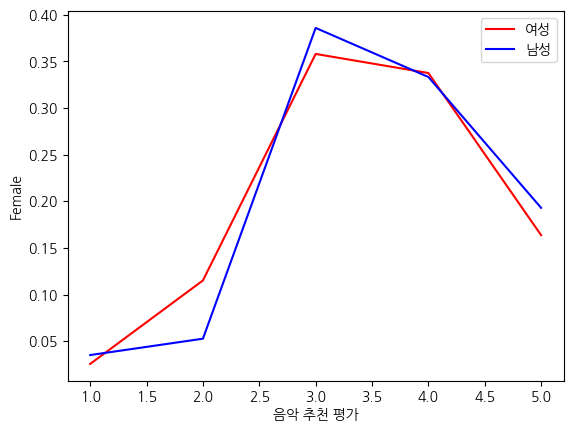

In [21]:
sns.lineplot(data=temp, x='ÏùåÏïÖ Ï∂îÏ≤ú ÌèâÍ∞Ä', y='Female', color='red', label ='Ïó¨ÏÑ±')
sns.lineplot(data=temp, x='ÏùåÏïÖ Ï∂îÏ≤ú ÌèâÍ∞Ä', y='Male', color='blue', label='ÎÇ®ÏÑ±')

In [22]:
# pivot_tableÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥ÄÌôò
pivot_df = df.pivot_table(index='ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ', columns='ÏÑ±Î≥Ñ', aggfunc='count', fill_value=0)
sex_rate = pivot_df['ÎÇòÏù¥']
row_sum = sex_rate.sum(axis=0)
temp = sex_rate.div(row_sum, axis=1).reset_index()
temp

ÏÑ±Î≥Ñ  ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ    Female      Male    Others
0   Afternoon  0.225064  0.192982  0.466667
1     Morning  0.179028  0.140351  0.333333
2       Night  0.595908  0.666667  0.200000

<Axes: xlabel='ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ', ylabel='Female'>

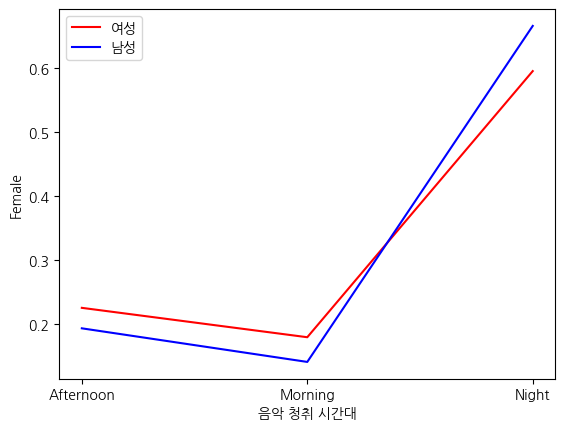

In [23]:
sns.lineplot(data=temp, x='ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ', y='Female', color='red', label ='Ïó¨ÏÑ±')
sns.lineplot(data=temp, x='ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ', y='Male', color='blue', label='ÎÇ®ÏÑ±')

### ÏÑ†Ìò∏ÎèÑ Ï°∞ÏÇ¨

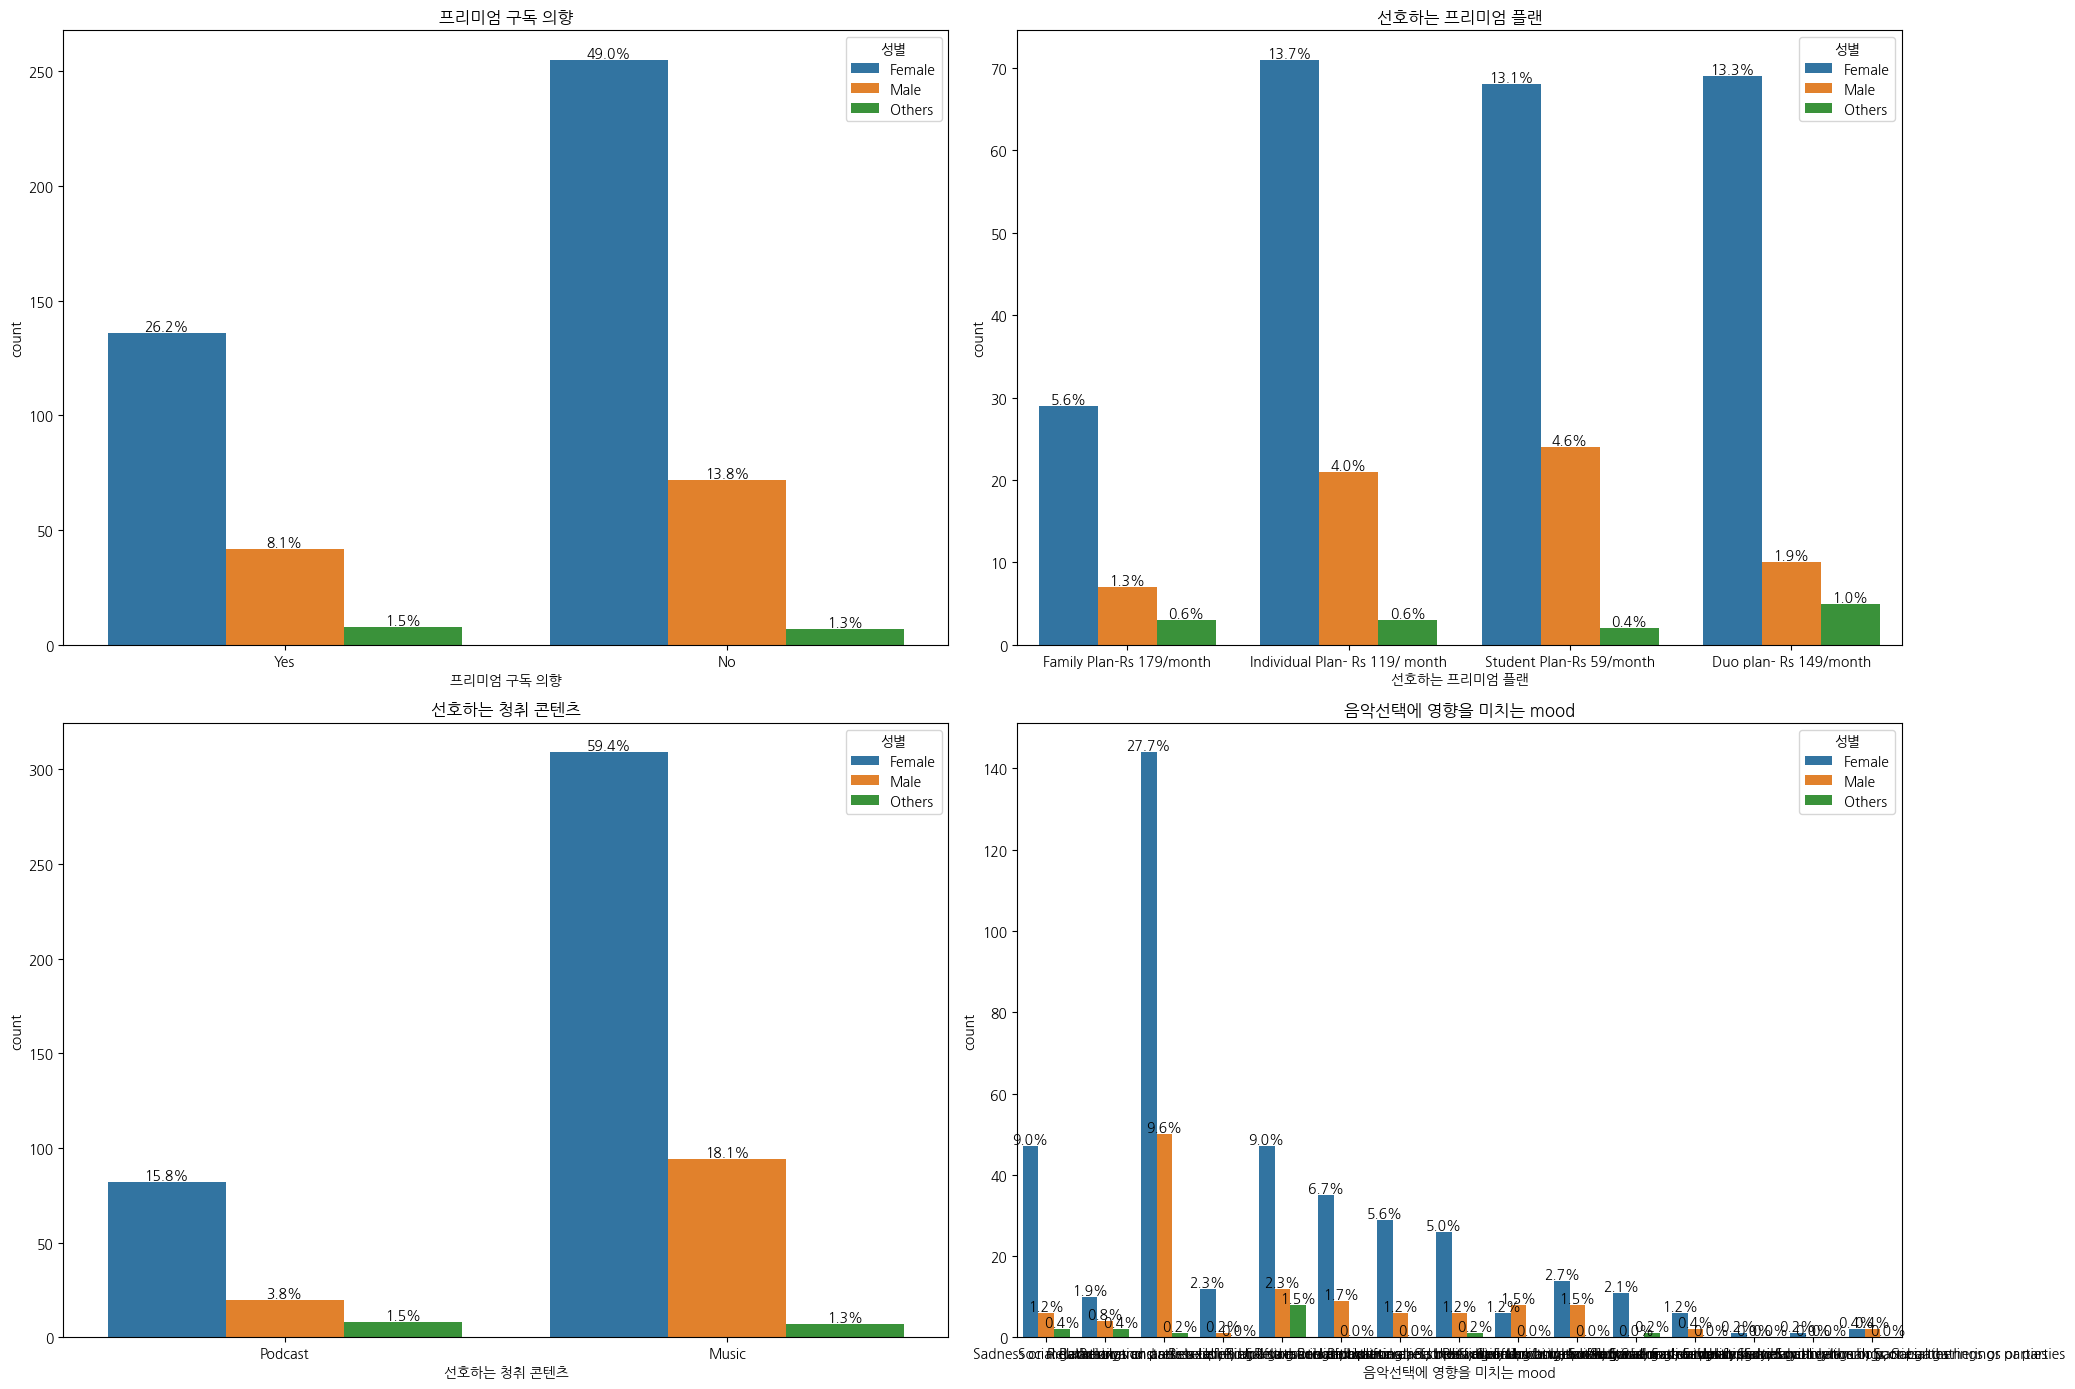

In [24]:
# Ïó¨Îü¨ Í∞úÏùò countplot Í∑∏Î¶¨Í∏∞
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(21, 14))

# Ï≤´ Î≤àÏß∏ subplot: ÏÑ±Î≥Ñ Î≥Ñ ÏÇ¨Ïö©Í∏∞Í∞Ñ
ax1 = sns.countplot(x='ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•', data=df, hue='ÏÑ±Î≥Ñ', ax=axes[0, 0])
axes[0, 0].set_title('ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•')

# Îëê Î≤àÏß∏ subplot: ÏÑ±Î≥Ñ Î≥Ñ Íµ¨ÎèÖ ÌîåÎûú
ax2 = sns.countplot(x='ÏÑ†Ìò∏ÌïòÎäî ÌîÑÎ¶¨ÎØ∏ÏóÑ ÌîåÎûú', data=df, hue='ÏÑ±Î≥Ñ', ax=axes[0, 1])
axes[0, 1].set_title('ÏÑ†Ìò∏ÌïòÎäî ÌîÑÎ¶¨ÎØ∏ÏóÑ ÌîåÎûú')

# ÏÑ∏ Î≤àÏß∏ subplot: ÏÑ±Î≥Ñ Î≥Ñ ÏùåÏïÖ Ï∂îÏ≤ú ÌèâÍ∞Ä
ax3 = sns.countplot(x='ÏÑ†Ìò∏ÌïòÎäî Ï≤≠Ï∑® ÏΩòÌÖêÏ∏†', data=df, hue='ÏÑ±Î≥Ñ', ax=axes[1, 0])
axes[1, 0].set_title('ÏÑ†Ìò∏ÌïòÎäî Ï≤≠Ï∑® ÏΩòÌÖêÏ∏†')

# ÎÑ§ Î≤àÏß∏ subplot: ÏÑ±Î≥Ñ Î≥Ñ ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ
ax4 = sns.countplot(x='ÏùåÏïÖÏÑ†ÌÉùÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî mood', data=df, hue='ÏÑ±Î≥Ñ', ax=axes[1, 1])
axes[1, 1].set_title('ÏùåÏïÖÏÑ†ÌÉùÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî mood')

# Í∞Å ÎßâÎåÄ ÏúÑÏóê ÎπÑÏú® ÌëúÏãú
for ax in [ax1, ax2, ax3, ax4]:
    total = len(df)  # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò Ï¥ù Í∞úÏàò
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y, percentage, ha='center', va='bottom')

# Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï
plt.tight_layout()
plt.show()


### ÌåüÏ∫êÏä§Ìä∏

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ÎÇòÏù¥                  520 non-null    object
 1   ÏÑ±Î≥Ñ                  520 non-null    object
 2   ÏÇ¨Ïö©Í∏∞Í∞Ñ                520 non-null    object
 3   Ï≤≠Ï∑® ÎîîÎ∞îÏù¥Ïä§             520 non-null    object
 4   Íµ¨ÎèÖ ÌîåÎûú               520 non-null    object
 5   ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•          520 non-null    object
 6   ÏÑ†Ìò∏ÌïòÎäî ÌîÑÎ¶¨ÎØ∏ÏóÑ ÌîåÎûú        312 non-null    object
 7   ÏÑ†Ìò∏ÌïòÎäî Ï≤≠Ï∑® ÏΩòÌÖêÏ∏†         520 non-null    object
 8   Ï¢ãÏïÑÌïòÎäî ÏùåÏïÖ Ïû•Î•¥          520 non-null    object
 9   ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ           520 non-null    object
 10  ÏùåÏïÖÏÑ†ÌÉùÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî mood  520 non-null    object
 11  ÏùåÏïÖ Ï≤≠Ï∑® ÎπàÎèÑ            520 non-null    object
 12  ÏùåÏïÖ ÌÉêÌóò Î∞©Î≤ï            520 non-null    object
 13  ÏùåÏ

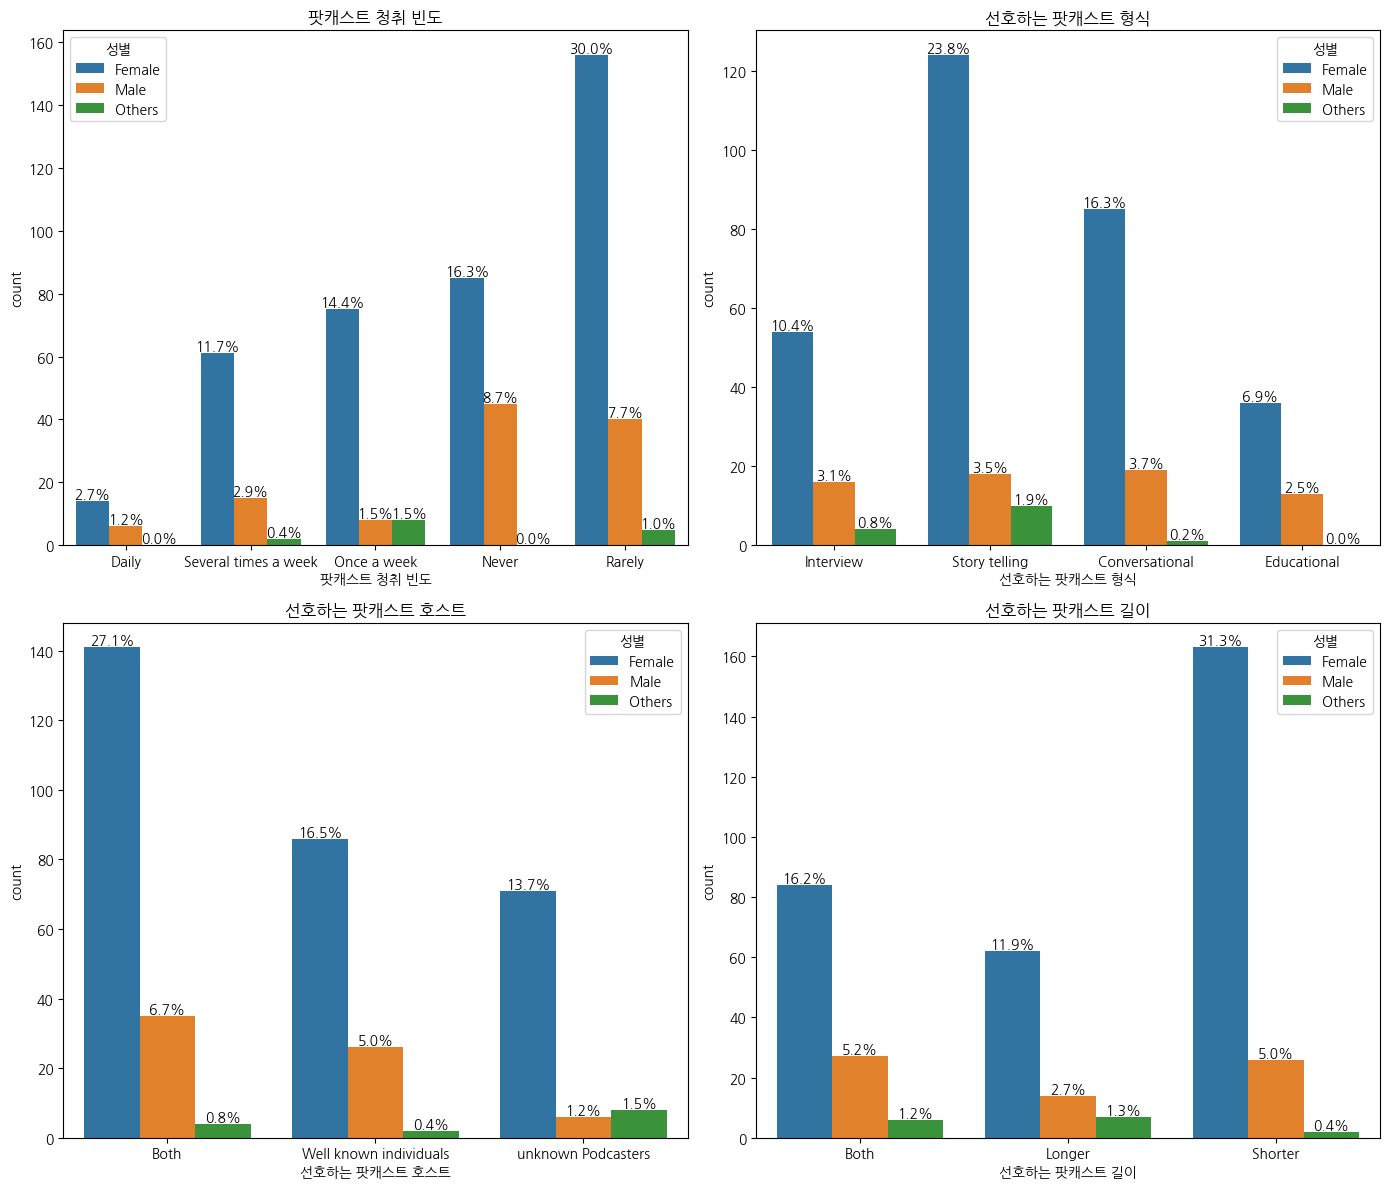

In [26]:
# Ïó¨Îü¨ Í∞úÏùò countplot Í∑∏Î¶¨Í∏∞
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

# Ï≤´ Î≤àÏß∏ subplot: ÏÑ±Î≥Ñ Î≥Ñ ÏÇ¨Ïö©Í∏∞Í∞Ñ
ax1 = sns.countplot(x='ÌåüÏ∫êÏä§Ìä∏ Ï≤≠Ï∑® ÎπàÎèÑ', data=df, hue='ÏÑ±Î≥Ñ', ax=axes[0, 0])
axes[0, 0].set_title('ÌåüÏ∫êÏä§Ìä∏ Ï≤≠Ï∑® ÎπàÎèÑ')

# Îëê Î≤àÏß∏ subplot: ÏÑ±Î≥Ñ Î≥Ñ Íµ¨ÎèÖ ÌîåÎûú
ax2 = sns.countplot(x='ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ ÌòïÏãù', data=df, hue='ÏÑ±Î≥Ñ', ax=axes[0, 1])
axes[0, 1].set_title('ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ ÌòïÏãù')

# ÏÑ∏ Î≤àÏß∏ subplot: ÏÑ±Î≥Ñ Î≥Ñ ÏùåÏïÖ Ï∂îÏ≤ú ÌèâÍ∞Ä
ax3 = sns.countplot(x='ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ Ìò∏Ïä§Ìä∏', data=df, hue='ÏÑ±Î≥Ñ', ax=axes[1, 0])
axes[1, 0].set_title('ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ Ìò∏Ïä§Ìä∏')

# ÎÑ§ Î≤àÏß∏ subplot: ÏÑ±Î≥Ñ Î≥Ñ ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ
ax4 = sns.countplot(x='ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ Í∏∏Ïù¥', data=df, hue='ÏÑ±Î≥Ñ', ax=axes[1, 1])
axes[1, 1].set_title('ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ Í∏∏Ïù¥')

# Í∞Å ÎßâÎåÄ ÏúÑÏóê ÎπÑÏú® ÌëúÏãú
for ax in [ax1, ax2, ax3, ax4]:
    total = len(df)  # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò Ï¥ù Í∞úÏàò
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y, percentage, ha='center', va='bottom')

# Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï
plt.tight_layout()
plt.show()


## ÏÇ¨Ïö©Í∏∞Í∞Ñ Ïã†Í∑úÏú†Ï†Ä/Ïû•Í∏∞ Ïú†Ï†ÄÍ∞ÑÏùò Ï∞®Ïù¥Ï†ê ÌôïÏù∏ (ÏÑúÎπÑÏä§ ÏßÄÌëúÎ°ú)

In [27]:
df['Ïã†Í∑úÏú†Ï†Ä Ïú†Î¨¥'] = 'X'
df.loc[df['ÏÇ¨Ïö©Í∏∞Í∞Ñ']== 'Less than 6 months', 'Ïã†Í∑úÏú†Ï†Ä Ïú†Î¨¥'] = 'O'

In [28]:
df['Ïã†Í∑úÏú†Ï†Ä Ïú†Î¨¥'].value_counts()

Ïã†Í∑úÏú†Ï†Ä Ïú†Î¨¥
X    429
O     91
Name: count, dtype: int64

In [29]:
df['ÏÇ¨Ïö©Í∏∞Í∞Ñ'].value_counts().sort_index()


ÏÇ¨Ïö©Í∏∞Í∞Ñ
1 year to 2 years     141
6 months to 1 year    119
Less than 6 months     91
More than 2 years     169
Name: count, dtype: int64

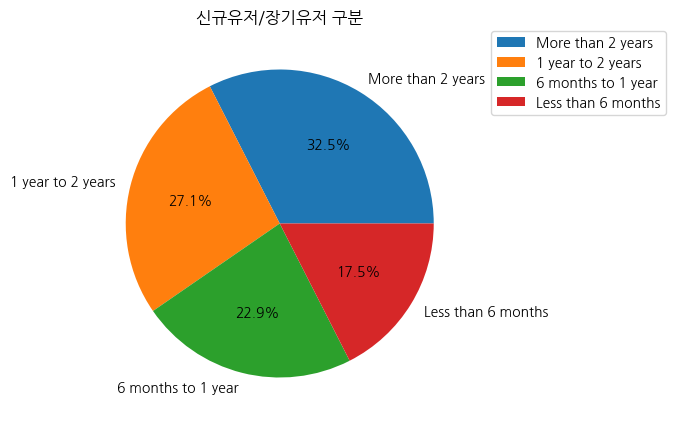

In [30]:
y=df['ÏÇ¨Ïö©Í∏∞Í∞Ñ'].value_counts()
plt.figure(figsize=(5,5))
labels= ['More than 2 years', '1 year to 2 years', '6 months to 1 year', 'Less than 6 months']
plt.pie(y, labels=labels, autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Ïã†Í∑úÏú†Ï†Ä/Ïû•Í∏∞Ïú†Ï†Ä Íµ¨Î∂Ñ')
plt.show()

### ÏÑúÎπÑÏä§ ÏßÄÌëú

Text(0.5, 1.0, 'ÏÇ¨Ïö©Í∏∞Í∞Ñ Î≥Ñ ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ')

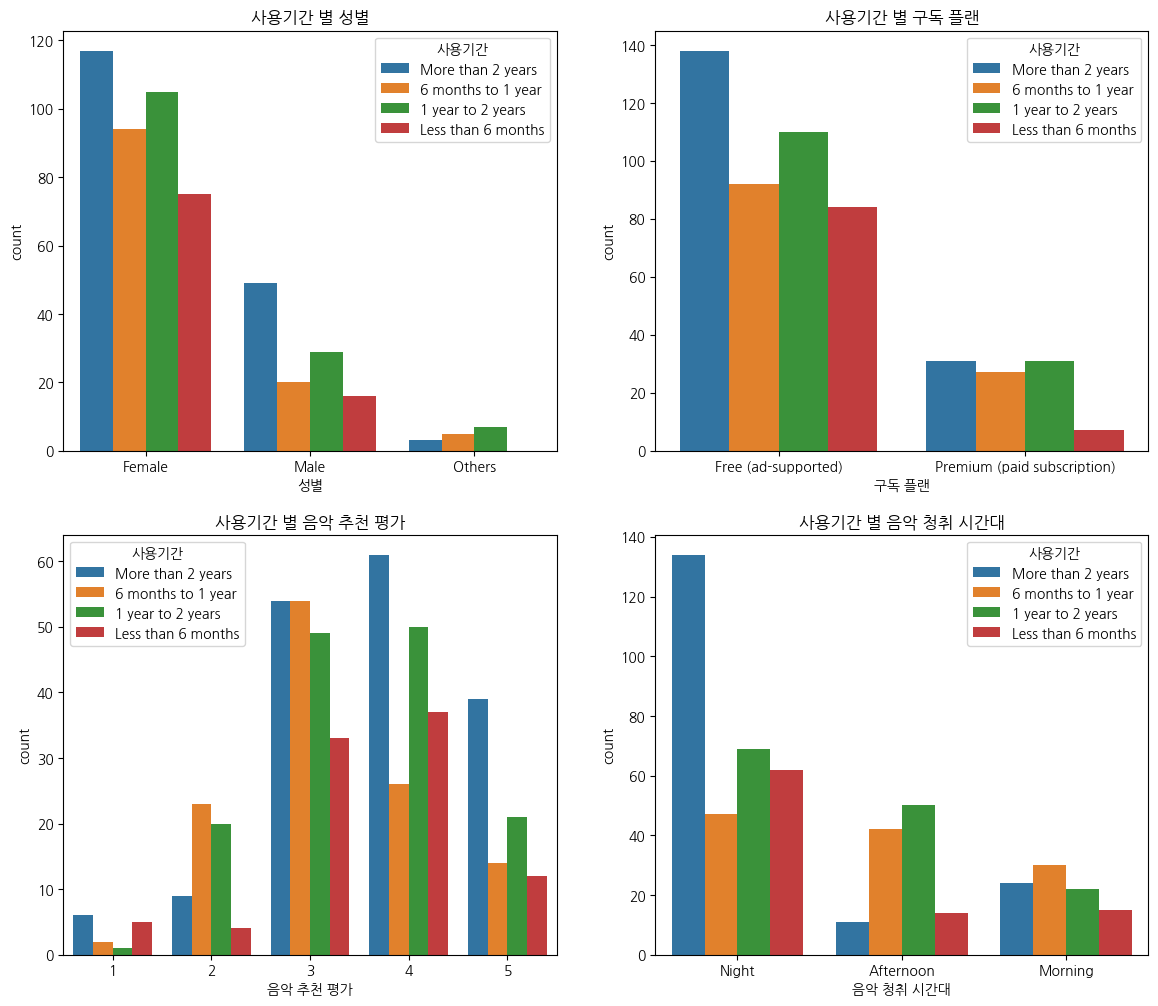

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

sns.countplot(x='ÏÑ±Î≥Ñ', data=df, hue='ÏÇ¨Ïö©Í∏∞Í∞Ñ', ax=axes[0, 0])
axes[0, 0].set_title('ÏÇ¨Ïö©Í∏∞Í∞Ñ Î≥Ñ ÏÑ±Î≥Ñ')

sns.countplot(x='Íµ¨ÎèÖ ÌîåÎûú', data=df, hue='ÏÇ¨Ïö©Í∏∞Í∞Ñ', ax=axes[0, 1])
axes[0, 1].set_title('ÏÇ¨Ïö©Í∏∞Í∞Ñ Î≥Ñ Íµ¨ÎèÖ ÌîåÎûú')

sns.countplot(x='ÏùåÏïÖ Ï∂îÏ≤ú ÌèâÍ∞Ä', data=df, hue='ÏÇ¨Ïö©Í∏∞Í∞Ñ', ax=axes[1, 0])
axes[1, 0].set_title('ÏÇ¨Ïö©Í∏∞Í∞Ñ Î≥Ñ ÏùåÏïÖ Ï∂îÏ≤ú ÌèâÍ∞Ä')

sns.countplot(x='ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ', data=df, hue='ÏÇ¨Ïö©Í∏∞Í∞Ñ', ax=axes[1, 1])
axes[1, 1].set_title('ÏÇ¨Ïö©Í∏∞Í∞Ñ Î≥Ñ ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ')


### ÏÑ†Ìò∏ÎèÑ Ï°∞ÏÇ¨

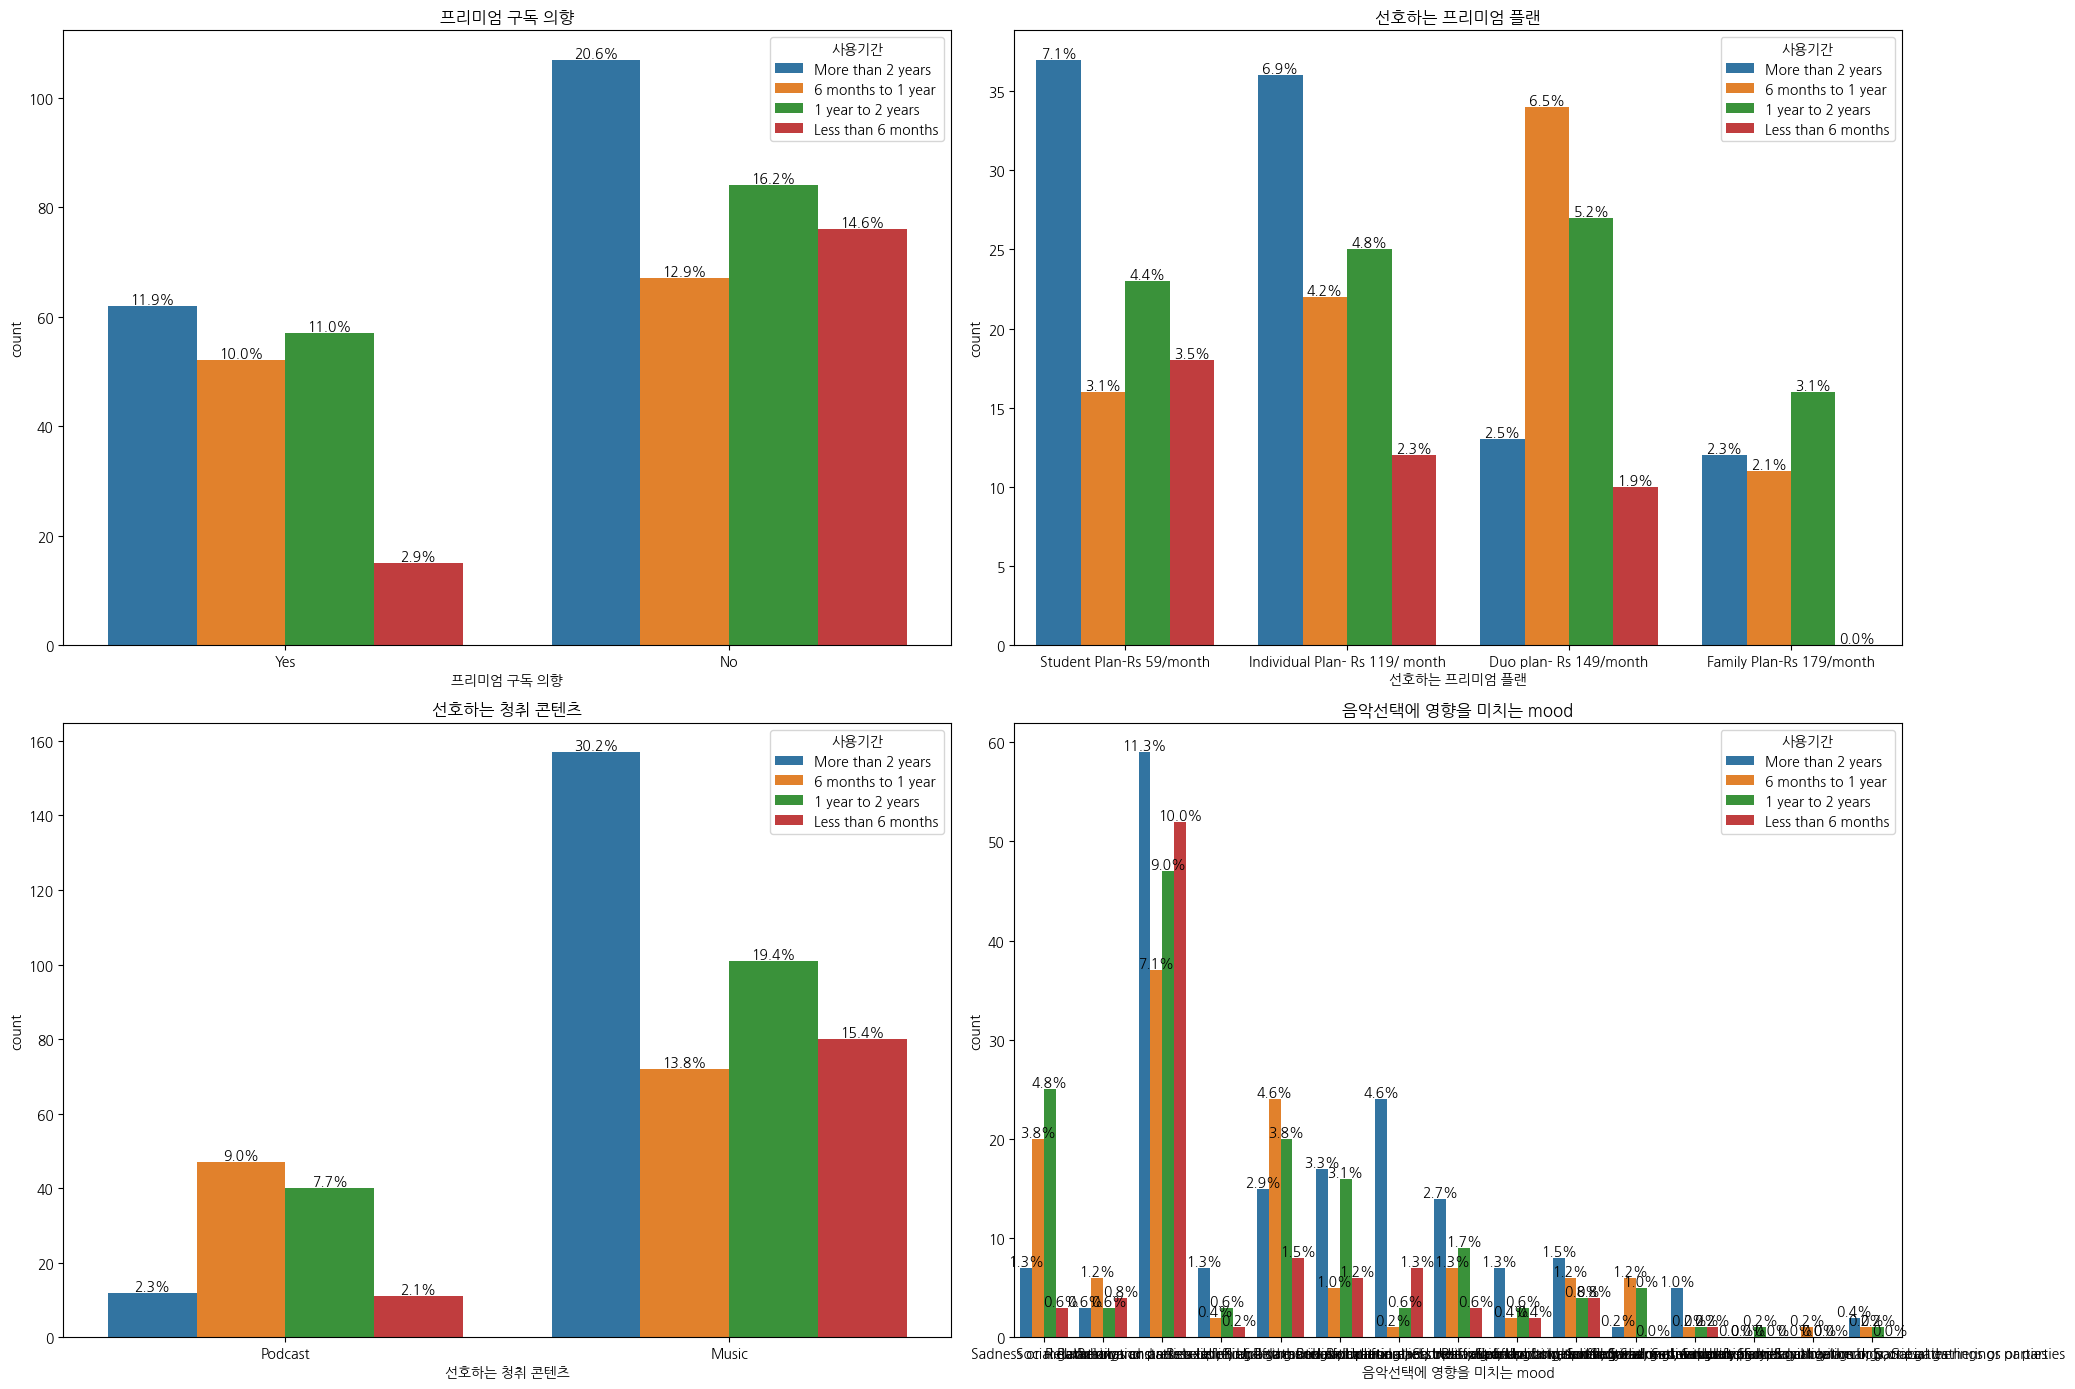

In [32]:
# Ïó¨Îü¨ Í∞úÏùò countplot Í∑∏Î¶¨Í∏∞
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(21, 14))

# Ï≤´ Î≤àÏß∏ subplot: ÏÑ±Î≥Ñ Î≥Ñ ÏÇ¨Ïö©Í∏∞Í∞Ñ
ax1 = sns.countplot(x='ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•', data=df, hue='ÏÇ¨Ïö©Í∏∞Í∞Ñ', ax=axes[0, 0])
axes[0, 0].set_title('ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•')

# Îëê Î≤àÏß∏ subplot: ÏÑ±Î≥Ñ Î≥Ñ Íµ¨ÎèÖ ÌîåÎûú
ax2 = sns.countplot(x='ÏÑ†Ìò∏ÌïòÎäî ÌîÑÎ¶¨ÎØ∏ÏóÑ ÌîåÎûú', data=df, hue='ÏÇ¨Ïö©Í∏∞Í∞Ñ', 
                    order = ['Student Plan-Rs 59/month', 'Individual Plan- Rs 119/ month', 'Duo plan- Rs 149/month', 'Family Plan-Rs 179/month'],
                    ax=axes[0, 1])
axes[0, 1].set_title('ÏÑ†Ìò∏ÌïòÎäî ÌîÑÎ¶¨ÎØ∏ÏóÑ ÌîåÎûú')

# ÏÑ∏ Î≤àÏß∏ subplot: ÏÑ±Î≥Ñ Î≥Ñ ÏùåÏïÖ Ï∂îÏ≤ú ÌèâÍ∞Ä
ax3 = sns.countplot(x='ÏÑ†Ìò∏ÌïòÎäî Ï≤≠Ï∑® ÏΩòÌÖêÏ∏†', data=df, hue='ÏÇ¨Ïö©Í∏∞Í∞Ñ', ax=axes[1, 0])
axes[1, 0].set_title('ÏÑ†Ìò∏ÌïòÎäî Ï≤≠Ï∑® ÏΩòÌÖêÏ∏†')

# ÎÑ§ Î≤àÏß∏ subplot: ÏÑ±Î≥Ñ Î≥Ñ ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ
ax4 = sns.countplot(x='ÏùåÏïÖÏÑ†ÌÉùÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî mood', data=df, hue='ÏÇ¨Ïö©Í∏∞Í∞Ñ', ax=axes[1, 1])
axes[1, 1].set_title('ÏùåÏïÖÏÑ†ÌÉùÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî mood')

# Í∞Å ÎßâÎåÄ ÏúÑÏóê ÎπÑÏú® ÌëúÏãú
for ax in [ax1, ax2, ax3, ax4]:
    total = len(df)  # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò Ï¥ù Í∞úÏàò
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y, percentage, ha='center', va='bottom')

# Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï
plt.tight_layout()
plt.show()


### ÌåüÏ∫êÏä§Ìä∏

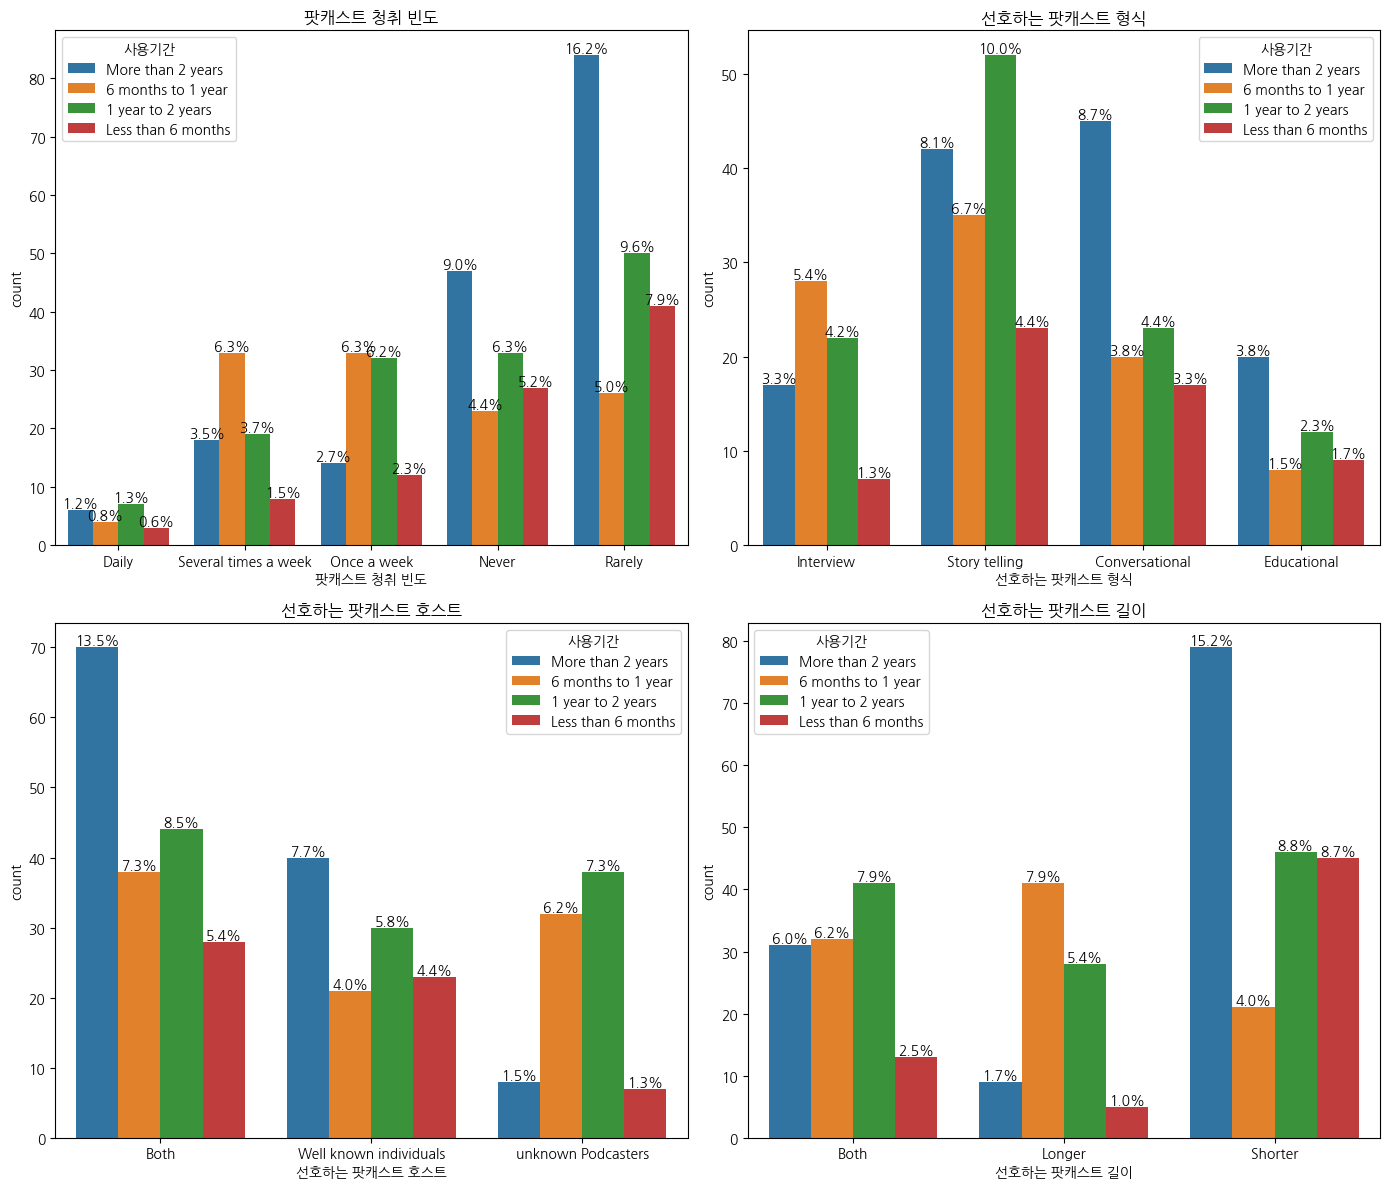

In [33]:
# Ïó¨Îü¨ Í∞úÏùò countplot Í∑∏Î¶¨Í∏∞
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

# Ï≤´ Î≤àÏß∏ subplot: ÏÑ±Î≥Ñ Î≥Ñ ÏÇ¨Ïö©Í∏∞Í∞Ñ
ax1 = sns.countplot(x='ÌåüÏ∫êÏä§Ìä∏ Ï≤≠Ï∑® ÎπàÎèÑ', data=df, hue='ÏÇ¨Ïö©Í∏∞Í∞Ñ', ax=axes[0, 0])
axes[0, 0].set_title('ÌåüÏ∫êÏä§Ìä∏ Ï≤≠Ï∑® ÎπàÎèÑ')

# Îëê Î≤àÏß∏ subplot: ÏÑ±Î≥Ñ Î≥Ñ Íµ¨ÎèÖ ÌîåÎûú
ax2 = sns.countplot(x='ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ ÌòïÏãù', data=df, hue='ÏÇ¨Ïö©Í∏∞Í∞Ñ', ax=axes[0, 1])
axes[0, 1].set_title('ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ ÌòïÏãù')

# ÏÑ∏ Î≤àÏß∏ subplot: ÏÑ±Î≥Ñ Î≥Ñ ÏùåÏïÖ Ï∂îÏ≤ú ÌèâÍ∞Ä
ax3 = sns.countplot(x='ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ Ìò∏Ïä§Ìä∏', data=df, hue='ÏÇ¨Ïö©Í∏∞Í∞Ñ', ax=axes[1, 0])
axes[1, 0].set_title('ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ Ìò∏Ïä§Ìä∏')

# ÎÑ§ Î≤àÏß∏ subplot: ÏÑ±Î≥Ñ Î≥Ñ ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ
ax4 = sns.countplot(x='ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ Í∏∏Ïù¥', data=df, hue='ÏÇ¨Ïö©Í∏∞Í∞Ñ', ax=axes[1, 1])
axes[1, 1].set_title('ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ Í∏∏Ïù¥')

# Í∞Å ÎßâÎåÄ ÏúÑÏóê ÎπÑÏú® ÌëúÏãú
for ax in [ax1, ax2, ax3, ax4]:
    total = len(df)  # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò Ï¥ù Í∞úÏàò
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y, percentage, ha='center', va='bottom')

# Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï
plt.tight_layout()
plt.show()


## Ïú†Î£å Íµ¨Îß§ ÏùòÌñ• ÏûàÎäî Ïú†Ï†ÄÎì§ÏùÄ Ïôú?


In [34]:
# pivot_tableÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥ÄÌôò
pivot_df = df.pivot_table(index='ÏùåÏïÖ Ï∂îÏ≤ú ÌèâÍ∞Ä', columns='ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•', aggfunc='count', fill_value=0)
sex_rate = pivot_df['ÎÇòÏù¥']
row_sum = sex_rate.sum(axis=0)
temp = sex_rate.div(row_sum, axis=1).reset_index()
temp

ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•  ÏùåÏïÖ Ï∂îÏ≤ú ÌèâÍ∞Ä        No       Yes
0                  1  0.026946  0.026882
1                  2  0.089820  0.139785
2                  3  0.350299  0.392473
3                  4  0.371257  0.268817
4                  5  0.161677  0.172043

In [35]:
sns.lineplot(data=temp, x='ÏùåÏïÖ Ï∂îÏ≤ú ÌèâÍ∞Ä', y='No', color='red', label ='Ïú†Î£å Íµ¨Îß§ ÏùòÌñ•X')
sns.lineplot(data=temp, x='ÏùåÏïÖ Ï∂îÏ≤ú ÌèâÍ∞Ä', y='Yes', color='blue', label='Ïú†Î£å Íµ¨Îß§ ÏùòÌñ• O')

<Axes: xlabel='ÏùåÏïÖ Ï∂îÏ≤ú ÌèâÍ∞Ä', ylabel='No'>

In [36]:
# pivot_tableÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥ÄÌôò
pivot_df = df.pivot_table(index='Íµ¨ÎèÖ ÌîåÎûú', columns='ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•', aggfunc='count', fill_value=0)
sex_rate = pivot_df['ÎÇòÏù¥']
row_sum = sex_rate.sum(axis=0)
temp = sex_rate.div(row_sum, axis=1).reset_index()
temp

ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•                        Íµ¨ÎèÖ ÌîåÎûú        No       Yes
0                   Free (ad-supported)  0.928144  0.612903
1           Premium (paid subscription)  0.071856  0.387097

Text(0.5, 1.0, 'ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ• Î≥Ñ ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ')

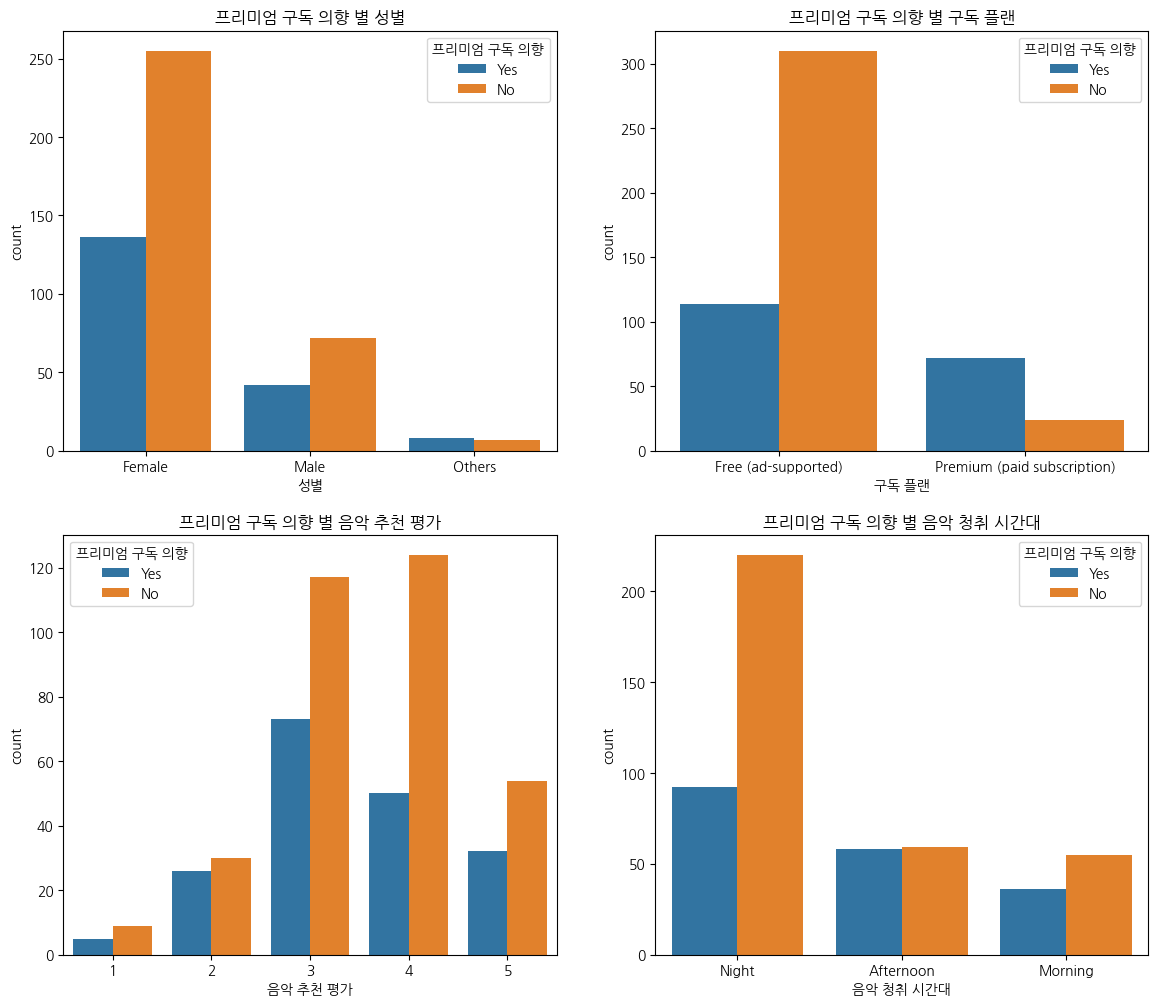

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

sns.countplot(x='ÏÑ±Î≥Ñ', data=df, hue='ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•', ax=axes[0, 0])
axes[0, 0].set_title('ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ• Î≥Ñ ÏÑ±Î≥Ñ')

sns.countplot(x='Íµ¨ÎèÖ ÌîåÎûú', data=df, hue='ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•', ax=axes[0, 1])
axes[0, 1].set_title('ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ• Î≥Ñ Íµ¨ÎèÖ ÌîåÎûú')

sns.countplot(x='ÏùåÏïÖ Ï∂îÏ≤ú ÌèâÍ∞Ä', data=df, hue='ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•', ax=axes[1, 0])
axes[1, 0].set_title('ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ• Î≥Ñ ÏùåÏïÖ Ï∂îÏ≤ú ÌèâÍ∞Ä')

sns.countplot(x='ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ', data=df, hue='ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•', ax=axes[1, 1])
axes[1, 1].set_title('ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ• Î≥Ñ ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ')


## ÏÉÅÍ¥ÄÍ≥ÑÏàò (ÌîºÏñ¥Ïä®)

In [38]:
df.columns

Index(['ÎÇòÏù¥', 'ÏÑ±Î≥Ñ', 'ÏÇ¨Ïö©Í∏∞Í∞Ñ', 'Ï≤≠Ï∑® ÎîîÎ∞îÏù¥Ïä§', 'Íµ¨ÎèÖ ÌîåÎûú', 'ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•', 'ÏÑ†Ìò∏ÌïòÎäî ÌîÑÎ¶¨ÎØ∏ÏóÑ ÌîåÎûú',
       'ÏÑ†Ìò∏ÌïòÎäî Ï≤≠Ï∑® ÏΩòÌÖêÏ∏†', 'Ï¢ãÏïÑÌïòÎäî ÏùåÏïÖ Ïû•Î•¥', 'ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ', 'ÏùåÏïÖÏÑ†ÌÉùÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî mood',
       'ÏùåÏïÖ Ï≤≠Ï∑® ÎπàÎèÑ', 'ÏùåÏïÖ ÌÉêÌóò Î∞©Î≤ï', 'ÏùåÏïÖ Ï∂îÏ≤ú ÌèâÍ∞Ä', 'ÌåüÏ∫êÏä§Ìä∏ Ï≤≠Ï∑® ÎπàÎèÑ', 'ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ Ïû•Î•¥',
       'ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ ÌòïÏãù', 'ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ Ìò∏Ïä§Ìä∏', 'ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ Í∏∏Ïù¥', 'ÌåüÏ∫êÏä§Ìä∏ Îã§ÏñëÏÑ± ÎßåÏ°±ÎèÑ',
       'Ïã†Í∑úÏú†Ï†Ä Ïú†Î¨¥'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ÎÇòÏù¥                  520 non-null    object
 1   ÏÑ±Î≥Ñ                  520 non-null    object
 2   ÏÇ¨Ïö©Í∏∞Í∞Ñ                520 non-null    object
 3   Ï≤≠Ï∑® ÎîîÎ∞îÏù¥Ïä§             520 non-null    object
 4   Íµ¨ÎèÖ ÌîåÎûú               520 non-null    object
 5   ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•          520 non-null    object
 6   ÏÑ†Ìò∏ÌïòÎäî ÌîÑÎ¶¨ÎØ∏ÏóÑ ÌîåÎûú        312 non-null    object
 7   ÏÑ†Ìò∏ÌïòÎäî Ï≤≠Ï∑® ÏΩòÌÖêÏ∏†         520 non-null    object
 8   Ï¢ãÏïÑÌïòÎäî ÏùåÏïÖ Ïû•Î•¥          520 non-null    object
 9   ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ           520 non-null    object
 10  ÏùåÏïÖÏÑ†ÌÉùÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî mood  520 non-null    object
 11  ÏùåÏïÖ Ï≤≠Ï∑® ÎπàÎèÑ            520 non-null    object
 12  ÏùåÏïÖ ÌÉêÌóò Î∞©Î≤ï            520 non-null    object
 13  ÏùåÏ

In [40]:
temp = df.copy()

In [41]:

# Label EncodingÏùÑ ÏúÑÌïú Ìï®Ïàò Ï†ïÏùò
def label_encode_column(column):
    le = LabelEncoder()
    encoded_column = le.fit_transform(column)
    encoding_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    return encoded_column, encoding_mapping

# Ïó¨Îü¨ Ïª¨ÎüºÏóê ÎåÄÌï¥ Label Encoding ÏàòÌñâ
columns_to_encode = ['ÎÇòÏù¥', 'ÏÑ±Î≥Ñ', 'ÏÇ¨Ïö©Í∏∞Í∞Ñ', 'Ï≤≠Ï∑® ÎîîÎ∞îÏù¥Ïä§', 'Íµ¨ÎèÖ ÌîåÎûú', 'ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•', 'ÏÑ†Ìò∏ÌïòÎäî ÌîÑÎ¶¨ÎØ∏ÏóÑ ÌîåÎûú',
       'ÏÑ†Ìò∏ÌïòÎäî Ï≤≠Ï∑® ÏΩòÌÖêÏ∏†', 'Ï¢ãÏïÑÌïòÎäî ÏùåÏïÖ Ïû•Î•¥', 'ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ', 'ÏùåÏïÖÏÑ†ÌÉùÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî mood',
       'ÏùåÏïÖ Ï≤≠Ï∑® ÎπàÎèÑ', 'ÏùåÏïÖ ÌÉêÌóò Î∞©Î≤ï', 'ÌåüÏ∫êÏä§Ìä∏ Ï≤≠Ï∑® ÎπàÎèÑ', 'ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ Ïû•Î•¥',
       'ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ ÌòïÏãù', 'ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ Ìò∏Ïä§Ìä∏', 'ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ Í∏∏Ïù¥', 'ÌåüÏ∫êÏä§Ìä∏ Îã§ÏñëÏÑ± ÎßåÏ°±ÎèÑ',
       'Ïã†Í∑úÏú†Ï†Ä Ïú†Î¨¥']

encoded_mapping_dict = {}
for column in columns_to_encode:
    temp[column], encoding_mapping = label_encode_column(temp[column])
    encoded_mapping_dict[column] = encoding_mapping

# Í≤∞Í≥º Ï∂úÎ†•
print("\nÏù∏ÏΩîÎî©Îêú Í∞í Îß§Ìïë:")
for column, mapping in encoded_mapping_dict.items():
    print(f"{column}: {mapping}\n")



Ïù∏ÏΩîÎî©Îêú Í∞í Îß§Ìïë:
ÎÇòÏù¥: {'12-20': 0, '20-35': 1, '35-60': 2, '6-12': 3, '60+': 4}

ÏÑ±Î≥Ñ: {'Female': 0, 'Male': 1, 'Others': 2}

ÏÇ¨Ïö©Í∏∞Í∞Ñ: {'1 year to 2 years': 0, '6 months to 1 year': 1, 'Less than 6 months': 2, 'More than 2 years': 3}

Ï≤≠Ï∑® ÎîîÎ∞îÏù¥Ïä§: {'Computer or laptop': 0, 'Computer or laptop, Smart speakers or voice assistants': 1, 'Computer or laptop, Smart speakers or voice assistants, Wearable devices': 2, 'Computer or laptop, Wearable devices': 3, 'Smart speakers or voice assistants': 4, 'Smart speakers or voice assistants, Wearable devices': 5, 'Smartphone': 6, 'Smartphone, Computer or laptop': 7, 'Smartphone, Computer or laptop, Smart speakers or voice assistants': 8, 'Smartphone, Computer or laptop, Smart speakers or voice assistants, Wearable devices': 9, 'Smartphone, Computer or laptop, Wearable devices': 10, 'Smartphone, Smart speakers or voice assistants': 11, 'Smartphone, Smart speakers or voice assistants, Wearable devices': 12, 'Smartphone, Wea

In [42]:
temp

ÎÇòÏù¥  ÏÑ±Î≥Ñ  ÏÇ¨Ïö©Í∏∞Í∞Ñ  Ï≤≠Ï∑® ÎîîÎ∞îÏù¥Ïä§  Íµ¨ÎèÖ ÌîåÎûú  ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•  ÏÑ†Ìò∏ÌïòÎäî ÌîÑÎ¶¨ÎØ∏ÏóÑ ÌîåÎûú  ÏÑ†Ìò∏ÌïòÎäî Ï≤≠Ï∑® ÏΩòÌÖêÏ∏†  \
0     1   0     3        4      0           1             1            1   
1     0   1     3        0      0           1             2            1   
2     2   2     1        4      0           1             3            1   
3     1   0     0       11      0           0             4            0   
4     1   0     0        6      0           0             4            0   
..   ..  ..   ...      ...    ...         ...           ...          ...   
515   1   0     3       10      0           1             3            0   
516   1   0     3        7      0           1             3            0   
517   1   0     3        6      0           0             3            0   
518   1   0     1        6      1           1             2            0   
519   1   0     3        7      1           1             3            0   

     Ï¢ãÏïÑÌïòÎäî ÏùåÏïÖ Ïû•Î•¥  ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ  ...  ÏùåÏïÖ Ï≤≠Ï∑® ÎπàÎèÑ  ÏùåÏïÖ ÌÉêÌóò Î∞©Î≤ï  ÏùåÏïÖ Ï∂îÏ≤ú ÌèâÍ∞Ä  ÌåüÏ∫êÏä§Ìä∏ Ï≤≠Ï∑® ÎπàÎèÑ  \
0             4          2  ...        34         4         3           0   
1             7          0  ...        32         4         2           4   
2             6          2  ...        19         4         4           2   
3             4          2  ...        13        13         4           1   
4             4          2  ...        34        13         4           3   
..          ...        ...  ...       ...       ...       ...         ...   
515           6          1  ...        26        10         5           3   
516           6          2  ...        29         0         2           3   
517           6          2  ...        34        10         3           1   
518           4          2  ...        33        11         2           4   
519           6          2  ...        15         6         3           1   

     ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ Ïû•Î•¥  ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ ÌòïÏãù  ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ Ìò∏Ïä§Ìä∏  ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ Í∏∏Ïù¥  ÌåüÏ∫êÏä§Ìä∏ Îã§ÏñëÏÑ± ÎßåÏ°±ÎèÑ  \
0               1             2              0             0             1   
1               1             2              0             3             2   
2              16             2              3             0             2   
3              19             4              3             3             1   
4              10             3              1             0             1   
..            ...           ...            ...           ...           ...   
515            10             0              0             2             1   
516             1             3              0             2             1   
517            19             3              0             2             1   
518             1             0              0             1             2   
519            19             4              3             3             1   

     Ïã†Í∑úÏú†Ï†Ä Ïú†Î¨¥  
0          1  
1          1  
2          1  
3          1  
4          1  
..       ...  
515        1  
516        1  
517        1  
518        1  
519        1  

[520 rows x 21 columns]

In [43]:
# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌñâÎ†¨ Íµ¨ÌïòÍ∏∞
correlation_matrix = temp.corr()

In [44]:
# ÌûàÌä∏Îßµ 
plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1)

<Axes: >

- ÏÑ†Ìò∏ÌïòÎäî ÌîÑÎ¶¨ÎØ∏ÏóÑ ÌîåÎûú, ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ• 0.53
- Ï¢ãÏïÑÌïòÎäî ÏùåÏïÖ Ïû•Î•¥, ÏÑ†Ìò∏ÌïòÎäî Ï≤≠Ï∑® ÏΩòÌÖêÏ∏† 0.43
- Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ, ÏÑ†Ìò∏ÌïòÎäî Ï≤≠Ï∑® ÏΩòÌÖêÏ∏† 0.46

In [45]:
df['ÏÑ†Ìò∏ÌïòÎäî ÌîÑÎ¶¨ÎØ∏ÏóÑ ÌîåÎûú'].unique()

array(['Family Plan-Rs 179/month', 'Individual Plan- Rs 119/ month',
       'Student Plan-Rs 59/month', nan, 'Duo plan- Rs 149/month'],
      dtype=object)

In [46]:
df['ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•'].unique()

array(['Yes', 'No'], dtype=object)

# Ï£ºÏöî Ïù∏ÏÇ¨Ïù¥Ìä∏ÏôÄ Í∞ÄÏÑ§Í≤ÄÏ†ï

## ÏÑ±Î≥Ñ-ÌòÑ Íµ¨ÎèÖ ÌîåÎûú Ï∞®Ïù¥

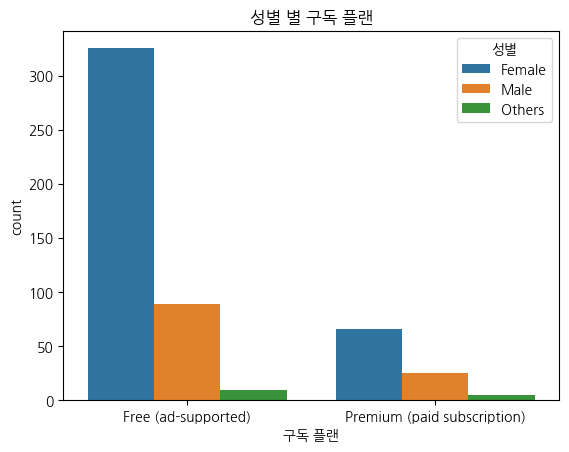

In [47]:
plt.title('ÏÑ±Î≥Ñ Î≥Ñ Íµ¨ÎèÖ ÌîåÎûú')
sns.countplot(x='Íµ¨ÎèÖ ÌîåÎûú', data=df, hue='ÏÑ±Î≥Ñ')
plt.show()

In [83]:
pivot_df = df.pivot_table(index='Íµ¨ÎèÖ ÌîåÎûú', columns='ÏÑ±Î≥Ñ', aggfunc='count', fill_value=0)
sex_rate = pivot_df['ÎÇòÏù¥']
row_sum = sex_rate.sum(axis=0)
sex_rate.div(row_sum, axis=1).reset_index()

ÏÑ±Î≥Ñ                        Íµ¨ÎèÖ ÌîåÎûú    Female      Male    Others
0           Free (ad-supported)  0.831202  0.780702  0.666667
1   Premium (paid subscription)  0.168798  0.219298  0.333333

- Í∑∏ÎûòÌîÑÎ°ú Î≥¥ÏïòÏùÑ Îïå, Îã®ÏàúÌûà Ïà´Ïûê, ÎπÑÏú®Î°ú Î≥¥ÏïòÏùÑ ÎïåÎäî Ïó¨ÏÑ±Ïù¥ Î¨¥Î£å ÌîåÎûúÏùÑ ÎÇ®ÏÑ±Î≥¥Îã§ Îçî ÏÑ†Ìò∏ÌïúÎã§Í≥† ÌåêÎã®Îê®

In [61]:
df[['ÏÑ±Î≥Ñ', 'Íµ¨ÎèÖ ÌîåÎûú']]

ÏÑ±Î≥Ñ                        Íµ¨ÎèÖ ÌîåÎûú
0    Female          Free (ad-supported)
1      Male          Free (ad-supported)
2    Others          Free (ad-supported)
3    Female          Free (ad-supported)
4    Female          Free (ad-supported)
..      ...                          ...
515  Female          Free (ad-supported)
516  Female          Free (ad-supported)
517  Female          Free (ad-supported)
518  Female  Premium (paid subscription)
519  Female  Premium (paid subscription)

[520 rows x 2 columns]

- Í∑ÄÎ¨¥Í∞ÄÏÑ§ : ÏÑ±Î≥ÑÍ≥º ÌòÑÏû¨ Íµ¨ÎèÖÌïòÍ≥† ÏûàÎäî ÌîåÎûúÏùÄ ÎèÖÎ¶ΩÏù¥Îã§.
- ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : ÏÑ±Î≥ÑÍ≥º ÌòÑÏû¨ Íµ¨ÎèÖÌïòÍ≥† ÏûàÎäî ÌîåÎûúÏùÄ Ï¢ÖÏÜçÏ†ÅÏù¥Îã§.

In [65]:
# Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï ÏàòÌñâ
crosstab_result = pd.crosstab(df['ÏÑ±Î≥Ñ'], df['Íµ¨ÎèÖ ÌîåÎûú'])
chi2, p, _, _ = chi2_contingency(crosstab_result)

# Í≤∞Í≥º Ï∂úÎ†•
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Ïú†ÏùòÏàòÏ§Ä 0.05ÏóêÏÑú Í≤ÄÏ†ï
alpha = 0.05
print("Í≤∞Í≥º:", "Ï∞®Ïù¥Í∞Ä ÏûàÎã§" if p < alpha else "Ï∞®Ïù¥Í∞Ä ÏóÜÎã§")

Chi-square value: 3.7647064820200056
P-value: 0.1522314466334885
Í≤∞Í≥º: Ï∞®Ïù¥Í∞Ä ÏóÜÎã§


- ÎÇ®ÏÑ±Í≥º Ïó¨ÏÑ±Ïùò Ïú†Î¨¥Î£å Íµ¨ÎèÖ ÌîåÎûúÏùÄ Ï∞®Ïù¥Í∞Ä ÏóÜÍ≥† ÏÑúÎ°ú ÎèÖÎ¶ΩÏ†ÅÏù¥Îã§.
- ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏßÄ ÏïäÏùÄ Ïù∏ÏÇ¨Ïù¥Ìä∏ ÏòÄÎçò Í≤ÉÏúºÎ°ú ÌåêÎã®

## Ïû•Í∏∞Ïú†Ï†ÄÏôÄ Ïã†Í∑úÏú†Ï†ÄÏùò Íµ¨ÎèÖÏùòÌñ•

<Axes: title={'center': 'ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•'}, xlabel='ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•', ylabel='count'>

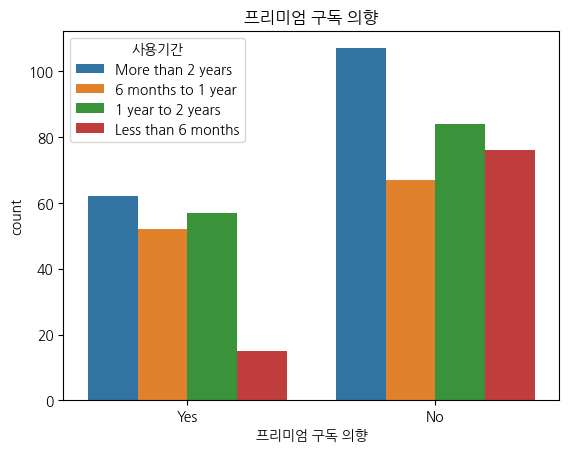

In [78]:
plt.title('ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•')
sns.countplot(x='ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•', data=df, hue='ÏÇ¨Ïö©Í∏∞Í∞Ñ')

In [86]:
pivot_df = df.pivot_table(index='ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•', columns='ÏÇ¨Ïö©Í∏∞Í∞Ñ', aggfunc='count', fill_value=0)
sex_rate = pivot_df['ÎÇòÏù¥']
row_sum = sex_rate.sum(axis=0)
sex_rate.div(row_sum, axis=1).reset_index()

ÏÇ¨Ïö©Í∏∞Í∞Ñ ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•  1 year to 2 years  6 months to 1 year  Less than 6 months  \
0            No           0.595745            0.563025            0.835165   
1           Yes           0.404255            0.436975            0.164835   

ÏÇ¨Ïö©Í∏∞Í∞Ñ  More than 2 years  
0              0.633136  
1              0.366864

- Í∑∏ÎûòÌîÑÎ°ú Î≥¥ÏïòÏùÑ Îïå, Îã®ÏàúÌûà Ïà´Ïûê, ÎπÑÏú®Î°ú Î≥¥ÏïòÏùÑ Îïå Ïò§Îûò ÏÇ¨Ïö©Ìï†ÏàòÎ°ù ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•Ïù¥ ÏûàÎã§Í≥† ÎãµÎ≥ÄÌï®.
    - 2ÎÖÑ Ïù¥ÏÉÅ ÏÇ¨Ïö©Ìïú Ïú†Ï†Ä Ï†úÏô∏
    - Ïû•Í∏∞Í≥†Í∞ù Ï§ëÏóê Î¨¥Î£åÎ°ú ÏÇ¨Ïö©ÌïòÎäî ÏÇ¨ÎûåÏù¥ ÎßéÎã§Îäî Í≤É?
- Ïò§Îûò ÏÇ¨Ïö©ÌïòÎäî Í±∞Îûë ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖÏùòÌñ•Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎäîÏßÄ Í∂ÅÍ∏à!!!!!!!!!
    - Í∑ÄÎ¨¥Í∞ÄÏÑ§ : Ïä§Ìè¨Ìã∞ÌååÏù¥ ÏÇ¨Ïö©Í∏∞Í∞ÑÍ≥º ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖÏùòÌñ•ÏùÄ ÎèÖÎ¶ΩÏù¥Îã§.
    - ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : Ïä§Ìè¨Ìã∞ÌååÏù¥ ÏÇ¨Ïö©Í∏∞Í∞ÑÍ≥º ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖÏùòÌñ•ÏùÄ Ï¢ÖÏÜçÏ†ÅÏù¥Îã§.

In [87]:
# Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï ÏàòÌñâ
crosstab_result = pd.crosstab(df['ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•'], df['ÏÇ¨Ïö©Í∏∞Í∞Ñ'])
chi2, p, _, _ = chi2_contingency(crosstab_result)

# Í≤∞Í≥º Ï∂úÎ†•
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Ïú†ÏùòÏàòÏ§Ä 0.05ÏóêÏÑú Í≤ÄÏ†ï
alpha = 0.05
print("Í≤∞Í≥º:", "Ï∞®Ïù¥Í∞Ä ÏûàÎã§" if p < alpha else "Ï∞®Ïù¥Í∞Ä ÏóÜÎã§")

Chi-square value: 19.380158032331657
P-value: 0.00022811709367181427
Í≤∞Í≥º: Ï∞®Ïù¥Í∞Ä ÏûàÎã§


- ÏÇ¨Ïö©Í∏∞Í∞ÑÍ≥º ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•ÏùÑ Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏùÑ ÌÜµÌï¥ ÌôïÏù∏Ìï¥Î≥¥ÏïòÏùÑ Îïå, pÍ∞íÏù¥ 0.0002Î°ú ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïú Í¥ÄÎ†®ÏÑ±Ïù¥ ÏûàÎã§Îäî Í≤ÉÏùÑ Î∞úÍ≤¨ÌñàÎã§.
- Í∑∏Îü¨ÎÇò, Ïù¥ ÎëòÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî Îã® 0.07
    - ÏÉÅÍ¥Ä Í≥ÑÏàòÍ∞Ä ÎÇÆÎã§Îäî Í≤ÉÏùÄ Îëê Î≥ÄÏàò Í∞ÑÏóê ÏÑ†ÌòïÏ†ÅÏù∏ Í¥ÄÍ≥ÑÍ∞Ä ÏïΩÌïòÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏
    - Ïù¥Îäî Îã®ÏùºÌïú 'ÏÑ†Ìòï ÏÉÅÍ¥Ä Í¥ÄÍ≥Ñ'ÎßåÏùÑ ÎÇòÌÉÄÎÇ¥Îäî ÏßÄÌëú
- Ï¶â, ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÎäî ÏÑ†Ìòï Í¥ÄÍ≥ÑÎßåÏùÑ Ï∏°Ï†ïÌïòÍ∏∞ ÎïåÎ¨∏Ïóê ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎäî ÎÇÆÍ≤å ÎÇòÏò¨ÏßÄÎùºÎèÑ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌñàÍ∏∞ ÎïåÎ¨∏Ïóê ÏÇ¨Ïö©Í∏∞Í∞ÑÍ≥º ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•ÏóêÎäî ÎπÑÏÑ†ÌòïÏ†ÅÏù∏ Í¥ÄÍ≥ÑÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÎã§. 
    - Ïã§Ï†ú ÎãµÎ≥Ä
        - Ïã§Ï†úÎ°ú Ïïû 3Îã®Í≥ÑÏóêÏÑúÎäî ÏÇ¨Ïö©Í∏∞Í∞ÑÏù¥ Í∏∏ÏàòÎ°ù Íµ¨ÎèÖÏùòÌñ•Ïù¥ ÏûàÎã§Îäî ÎãµÎ≥ÄÏù¥ ÎÜíÏïòÏßÄÎßå
        - Í∞ÄÏû• Ïò§Îûò Ïä§Ìè¨Ìã∞ÌååÏù¥Î•º ÏÇ¨Ïö©Ìïú (2ÎÖÑ Ïù¥ÏÉÅ ÏÇ¨Ïö©Ìïú) Ïú†Ï†ÄÎäî Ïò§ÌûàÎ†§ Íµ¨ÎèÖÏùòÌñ•Ïù¥ ÏóÜÎã§Í≥† 36%Í∞Ä ÏùëÎãµÌï®
    - Ïò§ÌûàÎ†§ ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ≥¥Îã§ Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Ïù¥Ïö©ÌñàÏñ¥Ïïº ÌñàÎÇò?
        - GPT : Îî∞ÎùºÏÑú Îëê Î≥ÄÏàò Í∞ÑÏùò ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÏóê ÎåÄÌïú Ï†ïÎ≥¥Î•º ÏñªÏúºÎ†§Î©¥ ÏÉÅÍ¥Ä Í≥ÑÏàò ÎåÄÏã† Ï†ÅÏ†àÌïú ÎπÑÏÑ†Ìòï ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÎ•º Ï∏°Ï†ïÌïòÎäî Îã§Î•∏ ÏßÄÌëú(Ïòà: Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥Ä Í≥ÑÏàò)Î•º ÏÇ¨Ïö©Ìï¥Ïïº Ìï©ÎãàÎã§. Í∑∏Î¶¨Í≥† ÌäπÌûà ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ±ÏùÑ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ Ï∂îÍ∞ÄÏ†ÅÏù∏ ÌÜµÍ≥Ñ Í≤ÄÏ†ïÏù¥ ÌïÑÏöîÌï† Ïàò ÏûàÏäµÎãàÎã§.
        - NO. Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Íµ¨Ìï¥Î≥¥Îãà Ïò§ÌûàÎ†§ Îçî ÎÇÆÍ≤å ÎÇòÏò¥ 0.065

### Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò

In [95]:
temp

ÎÇòÏù¥  ÏÑ±Î≥Ñ  ÏÇ¨Ïö©Í∏∞Í∞Ñ  Ï≤≠Ï∑® ÎîîÎ∞îÏù¥Ïä§  Íµ¨ÎèÖ ÌîåÎûú  ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•  ÏÑ†Ìò∏ÌïòÎäî ÌîÑÎ¶¨ÎØ∏ÏóÑ ÌîåÎûú  ÏÑ†Ìò∏ÌïòÎäî Ï≤≠Ï∑® ÏΩòÌÖêÏ∏†  \
0     1   0     3        4      0           1             1            1   
1     0   1     3        0      0           1             2            1   
2     2   2     1        4      0           1             3            1   
3     1   0     0       11      0           0             4            0   
4     1   0     0        6      0           0             4            0   
..   ..  ..   ...      ...    ...         ...           ...          ...   
515   1   0     3       10      0           1             3            0   
516   1   0     3        7      0           1             3            0   
517   1   0     3        6      0           0             3            0   
518   1   0     1        6      1           1             2            0   
519   1   0     3        7      1           1             3            0   

     Ï¢ãÏïÑÌïòÎäî ÏùåÏïÖ Ïû•Î•¥  ÏùåÏïÖ Ï≤≠Ï∑® ÏãúÍ∞ÑÎåÄ  ...  ÏùåÏïÖ Ï≤≠Ï∑® ÎπàÎèÑ  ÏùåÏïÖ ÌÉêÌóò Î∞©Î≤ï  ÏùåÏïÖ Ï∂îÏ≤ú ÌèâÍ∞Ä  ÌåüÏ∫êÏä§Ìä∏ Ï≤≠Ï∑® ÎπàÎèÑ  \
0             4          2  ...        34         4         3           0   
1             7          0  ...        32         4         2           4   
2             6          2  ...        19         4         4           2   
3             4          2  ...        13        13         4           1   
4             4          2  ...        34        13         4           3   
..          ...        ...  ...       ...       ...       ...         ...   
515           6          1  ...        26        10         5           3   
516           6          2  ...        29         0         2           3   
517           6          2  ...        34        10         3           1   
518           4          2  ...        33        11         2           4   
519           6          2  ...        15         6         3           1   

     ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ Ïû•Î•¥  ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ ÌòïÏãù  ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ Ìò∏Ïä§Ìä∏  ÏÑ†Ìò∏ÌïòÎäî ÌåüÏ∫êÏä§Ìä∏ Í∏∏Ïù¥  ÌåüÏ∫êÏä§Ìä∏ Îã§ÏñëÏÑ± ÎßåÏ°±ÎèÑ  \
0               1             2              0             0             1   
1               1             2              0             3             2   
2              16             2              3             0             2   
3              19             4              3             3             1   
4              10             3              1             0             1   
..            ...           ...            ...           ...           ...   
515            10             0              0             2             1   
516             1             3              0             2             1   
517            19             3              0             2             1   
518             1             0              0             1             2   
519            19             4              3             3             1   

     Ïã†Í∑úÏú†Ï†Ä Ïú†Î¨¥  
0          1  
1          1  
2          1  
3          1  
4          1  
..       ...  
515        1  
516        1  
517        1  
518        1  
519        1  

[520 rows x 21 columns]

In [98]:
# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌñâÎ†¨ Íµ¨ÌïòÍ∏∞
correlation_matrix = temp.corr(method='spearman')

In [99]:
# ÌûàÌä∏Îßµ 
plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1)

<Axes: >

### ÏÇ∞Ï†êÎèÑ Í∑∏Î†§Î≥¥Í∏∞

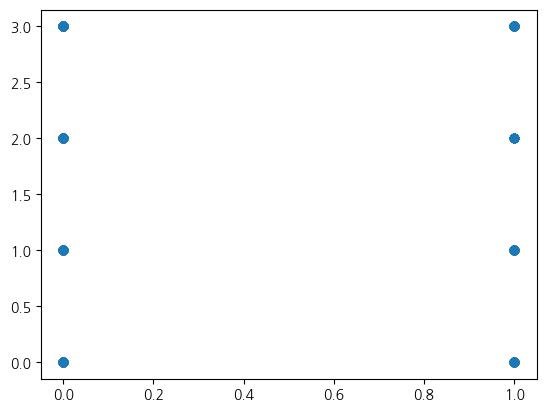

In [105]:
plt.scatter('ÌîÑÎ¶¨ÎØ∏ÏóÑ Íµ¨ÎèÖ ÏùòÌñ•', 'ÏÇ¨Ïö©Í∏∞Í∞Ñ', data=temp)

- omg

# Í≤∞Î°†
Spotify BM Î∞è ÏÇ¨Ïö©Ïûê ÌñâÎèô Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÏÑù ÌõÑ Ïï°ÏÖò ÏïÑÏù¥ÌÖúÏùÑ ÏßúÎäî Î™©Ï†Å
- 1. Ïú†Ï†Ä ÏàòÎ•º ÎäòÎ¶∞Îã§. (‚ùå)
    - ÎÇ®ÏÑ± ÏÇ¨Ïö©Ïûê 20% Ïó¨ÏÑ± 75%Î°ú, ÎÇ®ÏÑ± Ïú†Ï†Ä ÎπÑÏú®Ïù¥ Ï†ÅÎã§.
    - ÏàòÏπòÏÉÅÏúºÎ°ú ÎÇ®ÏÑ±ÏùÄ Ïó¨ÏÑ±Î≥¥Îã§ Ïú†Î£å ÌîåÎûúÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ΩÌñ•ÏùÑ ÌôïÏù∏Ìï®. 
        - ‚û°Ô∏è ÌãàÏÉàÏãúÏû•ÏúºÎ°ú ÎÇ®ÏÑ± Ïú†Ï†ÄÎ•º ÎäòÎ¶¨Î©¥, Ïú†Î£å Îß§Ï∂úÎèÑ Ï¶ùÍ∞ÄÌï† Ïàò ÏûàÏßÄ ÏïäÏùÑÍπå? Í∞ÄÏÑ§ ÏÑ∏ÏõÄ
    - Í∑∏Îü¨ÎÇò, Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏùÑ ÌÜµÌï¥ ```Ïù¥Îäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïú Ï∞®Ïù¥Í∞Ä ÏïÑÎãàÎ©∞(p=0.1522), ÏÑ±Î≥ÑÍ≥º Ïú†/Î¨¥Î£å ÌîåÎûúÏùÄ ÎèÖÎ¶ΩÏ†ÅÏù¥ÎùºÎäî Í≤∞Í≥ºÎ•º ÏñªÏóàÎã§.``` 
    - Ïú†Ï†Ä ÏàòÎ•º ÎäòÎ¶¨Í∏∞ÏúÑÌï¥ÏÑúÎäî Îã§Î•∏ Î∞©Î≤ï Î™®ÏÉâ ÌïÑÏöî
- 2. Î¨¥Î£å -> Ïú†Î£å ÌîåÎûúÏúºÎ°ú Ï†ÑÌôòÏãúÏºú ÏàòÏùµÏùÑ ÎäòÎ¶∞Îã§. (üî∫)
    - Ïû•Í∏∞Ïú†Ï†ÄÏùºÏàòÎ°ù Ïú†Î£å ÌîåÎûúÏùÑ Íµ¨ÎèÖÌïú ÏùòÌñ•Ïù¥ ÎÜíÏùÄ Í≤ÉÏùÑ ÌôïÏù∏ÌñàÎã§. 
        - Îã®, 2ÎÖÑÏù¥ÏÉÅÏù∏ Ïú†Ï†ÄÏ†úÏô∏, ÏµúÏû•Í∏∞Ïú†Ï†ÄÎì§ÏùÄ Íµ¨ÎèÖÏùòÌñ• ÏóÜÎã§Í≥† 36%Í∞Ä ÏùëÎãµ
    - Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏùÑ ÌÜµÌï¥ ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ†ïÏùÑ Ïã§ÏãúÌï¥Î≥¥Îãà, ÏÇ¨Ïö©Í∏∞Í∞ÑÍ≥º Íµ¨ÎèÖÏùòÌñ•ÏóêÎäî (p=0.0002) ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïú Í¥ÄÎ†®ÏÑ±Ïù¥ ÏûàÎã§Îäî Í≤ÉÏùÑ Î∞úÍ≤¨ÌñàÎã§. 
        - ‚û° ```üåüÏä§Ìè¨Ìã∞ÌååÏù¥ Ïï±ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Ïú†Ï†ÄÎ•º Ïù¥ÌÉàÌïòÏßÄ ÏïäÍ≥† Ïò§Îûò Ïú†ÏßÄÎßå ÌïúÎã§Î©¥, Ïú†Î£å ÌîåÎûúÏùÑ Íµ¨ÎèÖÌï† ÏùòÌñ• ÎòêÌïú ÎÜíÏïÑÏßà Ïàò ÏûàÏùåüåü```
- 3. Î≤àÏô∏) ÏàòÏπòÏÉÅÏúºÎ°ú ÏùåÏïÖÏ∂îÏ≤ú ÏãúÏä§ÌÖúÏóê ÎßåÏ°±Ìï†ÏàòÎ°ù Ïû•Í∏∞Ï†ÅÏúºÎ°ú Ïú†ÏßÄÌïòÎäî Í≤ÉÏùÑ ÌôïÏù∏ 
    - Ïú†Ï†ÄÎ•º Ïû•Í∏∞Ï†ÅÏúºÎ°ú Ïú†ÏßÄÏãúÌÇ§Í∏∞ ÏúÑÌï¥ÏÑúÎäî ÏùåÏïÖÏ∂îÏ≤ú ÏãúÏä§ÌÖúÏóê Ìà¨ÏûêÌï¥Îùº~~!!!!!